## **Overview**
**we will explore how to develop a suite of different types of LSTM models for time series forecasting.**

* ### **Univariate LSTM Models**

1. Data Preparation
2. Vanilla LSTM
3. Stacked LSTM
4. Bidirectional LSTM
5. CNN LSTM
6. ConvLSTM


* ### **Multivariate LSTM Models**

* ### **Multi-Step LSTM Models**

* ### **Multivariate Multi-Step LSTM Models**



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
# from scikeras.wrappers import KerasRegressor # 回归神经网络

In [2]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import keras.backend as K
import os
import glob

## Univariate LSTM Models
LSTMs can be used to model univariate time series forecasting problems.

These are problems comprised of a single series of observations and a model is required to learn from the series of past observations to predict the next value in the sequence.

We will demonstrate a number of variations of the LSTM model for univariate time series forecasting

## 1. CEEMDAN Data Preparation

In [3]:
# import os
# import glob
#
# csv_path = '../../Data/PreData/ArtiData'
# csv_files = glob.glob(os.path.join(csv_path, '*.csv'))
#
# start_index = 10  # 起始索引，即第4个文件
# end_index = 12  # 结束索引，即第6个文件（不包括第7个文件）
#
# for index, file in enumerate(csv_files[start_index:end_index]):
#     # LSTM_ALL(os.path.basename(file))
#     print(os.path.basename(file))
#     print("-------------------------")

IMF = []
xlsx_file = 'CEEMDAN_Data/La Jolla/'
xlsx_path = glob.glob(os.path.join(xlsx_file,'*.xlsx'))

data_col_len = pd.read_excel('CEEMDAN_Data/La Jolla/CEEMDAN_LaJolla Station_WL.xlsx')

for imf_len in range(len(data_col_len.columns)):
    for file in xlsx_path:
         print(file)
         # print(os.path.basename(file))
         imfs = pd.read_excel(file)
         imfn = imfs.iloc[:,imf_len]
         imfn.to_numpy()
         IMF.append(imfn)
    print(imf_len,"-------------------")

CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_AT.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_Baro.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WD.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WG.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WL.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WS.xlsx
0 -------------------
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_AT.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_Baro.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WD.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WG.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WL.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WS.xlsx
1 -------------------
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_AT.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_Baro.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WD.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WG.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_LaJolla Station_WL.xlsx
CEEMDAN_Data/La Jolla\CEEMDAN_La

### 结果绘制

In [4]:
def Result_Ana(Model, feature_num,name):
    print('Result_Ana_Function:',testX.shape)
    y_pred = Model.predict(testX)
    y_pred = np.array(y_pred).reshape(-1, 1)
    #将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将结果存储在prediction_copies_array数组中
    prediction_copies_array = np.repeat(y_pred, feature_num,axis=-1)
    #prediction_copies_array
    #prediction_copies_array.shape
    pred = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(y_pred), feature_num)))[:,feature_num-1] #进行逆变换但是，只需要最后一列

    # print(pred)
    print('Result_Ana_Function2:',testY.shape)
    original_copies_array = np.repeat(testY, feature_num, axis=-1)
    print('IMF_True:',scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), feature_num))))
    y_true = scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), feature_num)))[:, feature_num-1]
    print('feature_num-1_waterl level_true:',y_true)
    # y_true = scaler.inverse_transform(np.array(testY).reshape(-1,1))

    y_true
    pred
    print(pred)
    plt.figure(figsize=(9, 7))
    plt.plot(y_true, color='red', label='Real Value')
    plt.plot(pred, color='blue', label='Pred Value')
    plt.title('Prediction Water Level(m)')
    plt.xlabel('Time (h)')
    plt.ylabel('Water Level(m)')
    plt.legend()
    # plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)



    # y_true_data = pd.DataFrame(y)
    # y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
    #               index=False)
    # pred_data = pd.DataFrame(pred)
    # pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
    #              index=False)
    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import mean_absolute_error as mae
    from sklearn.metrics import r2_score as r2
    print('MSE:',mse(y_true,pred))
    print('MAE:',mae(y_true,pred))
    print('R²:',r2(y_true,pred))
    print('RMSE:',np.sqrt(mse(y_true,pred)))
    print('pred_finally:',pred)

    # 在图中添加R²和RMSE的数据
    plt.text(0.05, 0.9, f'R²: {r2(y_true, pred):.4f}', transform=plt.gca().transAxes, fontsize=14)
    plt.text(0.05, 0.85, f'RMSE: {np.sqrt(mse(y_true, pred)):.4f}', transform=plt.gca().transAxes, fontsize=14)

    # 保存图像为透明，并设置dpi=600
    plt.savefig(str(name) + '_IMF.png', bbox_inches='tight', transparent=True, dpi=600)
    plt.show()
    return y_true,pred

### LSTM

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
-------------------------- 0 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 0 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 3ms/step - loss: 0.0451 - val_loss: 0.0039
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0024
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 11/3

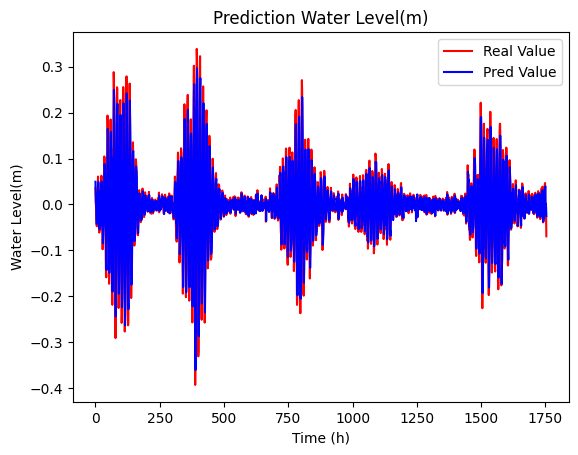

MSE: 0.0017543665681024393
MAE: 0.028814097596355916
R²: 0.723584121172693
RMSE: 0.041885159282285644
pred_finally: [ 0.04948902  0.02756064  0.00315831 ...  0.00055505 -0.00622695
 -0.02545449]
prediction_result: [ 0.04948902  0.02756064  0.00315831 ...  0.00055505 -0.00622695
 -0.02545449]
lstm_y_turs: [ 0.03621333  0.00732426 -0.00296509 ... -0.00431312 -0.02566993
 -0.06919002]
-------------------------- 1 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 1 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0654 - val_loss: 0.0053
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 11/3

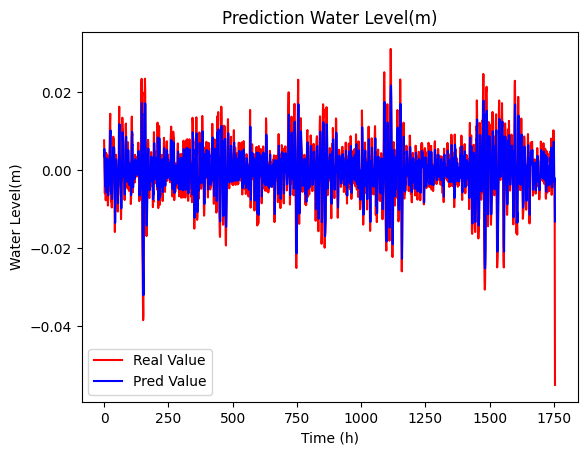

MSE: 2.5519394046597192e-05
MAE: 0.003880674974174258
R²: 0.5622796663922536
RMSE: 0.0050516724009576465
pred_finally: [ 0.0035868   0.00546911  0.00319862 ... -0.00299411 -0.00207061
 -0.01315437]
prediction_result: [ 0.0035868   0.00546911  0.00319862 ... -0.00299411 -0.00207061
 -0.01315437]
lstm_y_turs: [ 0.00767001  0.00431724 -0.0008971  ... -0.00290483 -0.01492227
 -0.05513317]
-------------------------- 2 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 2 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0567 - val_loss: 0.0191
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.0104
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0101
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0102
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0102
Epoch 11/3

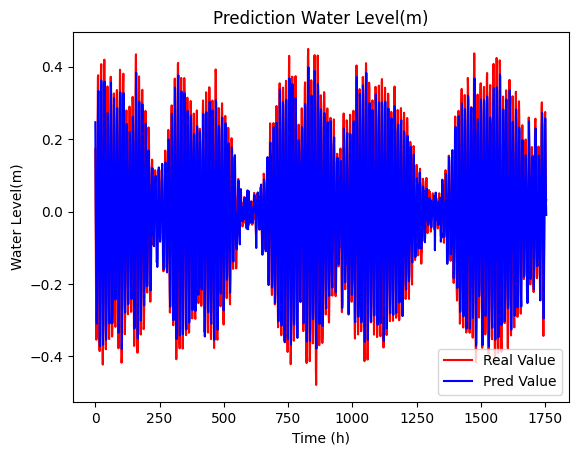

MSE: 0.010236653388866904
MAE: 0.08499640463673801
R²: 0.7639374681454184
RMSE: 0.10117634797158329
pred_finally: [ 0.24674824  0.10571475 -0.02405251 ...  0.14017111  0.02119949
 -0.00925422]
prediction_result: [ 0.24674824  0.10571475 -0.02405251 ...  0.14017111  0.02119949
 -0.00925422]
lstm_y_turs: [ 0.17250122  0.0198994  -0.1330869  ...  0.09810884  0.0262316
  0.0319723 ]
-------------------------- 3 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 3 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0499 - val_loss: 0.0103
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 11/3

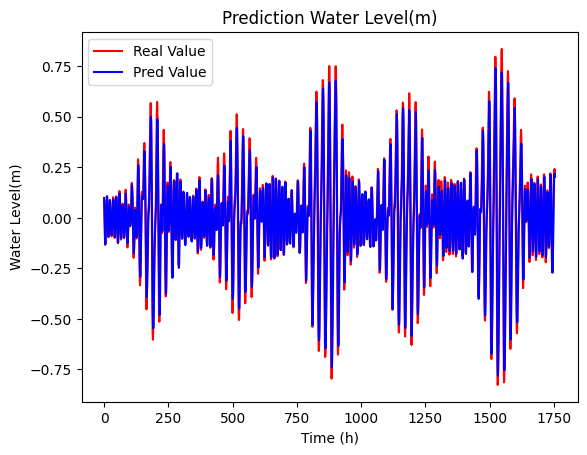

MSE: 0.006398112392758005
MAE: 0.06541151068705016
R²: 0.8984178181719806
RMSE: 0.07998820158472127
pred_finally: [0.09830751 0.07347775 0.01517922 ... 0.21810336 0.21868888 0.20436345]
prediction_result: [0.09830751 0.07347775 0.01517922 ... 0.21810336 0.21868888 0.20436345]
lstm_y_turs: [ 0.08270439  0.02838551 -0.04067162 ...  0.24199877  0.23604557
  0.2032358 ]
-------------------------- 4 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 4 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0574 - val_loss: 0.0125
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0031
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0036
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0039
Epoch 11/3

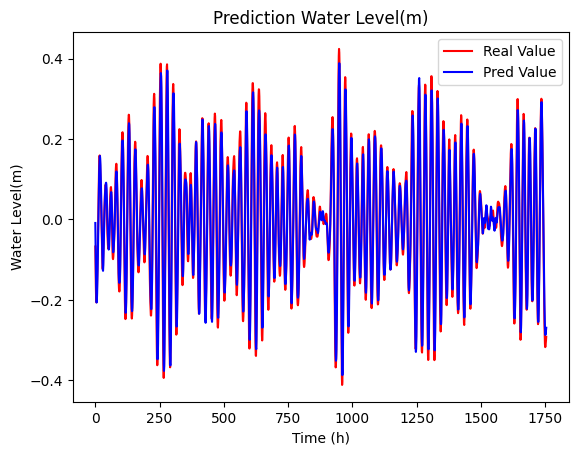

MSE: 0.0014236356705295962
MAE: 0.03031959272883662
R²: 0.9450671203594263
RMSE: 0.0377310968635898
pred_finally: [-0.00882162 -0.06089998 -0.1126159  ... -0.28376722 -0.2769102
 -0.26954904]
prediction_result: [-0.00882162 -0.06089998 -0.1126159  ... -0.28376722 -0.2769102
 -0.26954904]
lstm_y_turs: [-0.06733701 -0.11840432 -0.1630385  ... -0.3098935  -0.30138717
 -0.29206131]
-------------------------- 5 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 5 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0404 - val_loss: 0.0035
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 9.9963e-04
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 7.1662e-04 - val_loss: 2.4728e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 3.5865e-04 - val_loss: 2.3444e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 3.4669e-04 - val_loss: 2.1469e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 3.3936e-04 - val_loss: 2.0294e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 3.4340e-04 - val_loss: 2.0157e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 3.3922e-04 - val_loss: 1.9465e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 3.3273e-04 - val_loss: 1.9740e-04
Epoch 10/30
110/110 [==============================

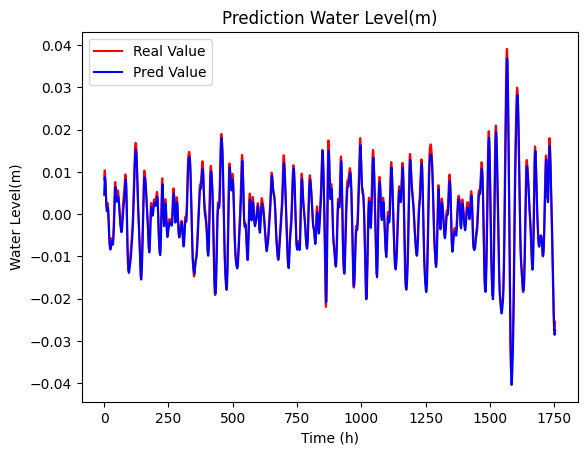

MSE: 4.128991509533831e-06
MAE: 0.001587111428269577
R²: 0.9555232068325596
RMSE: 0.0020319920052829514
pred_finally: [ 0.00461168  0.00677801  0.00818603 ... -0.02854499 -0.02827041
 -0.02749084]
prediction_result: [ 0.00461168  0.00677801  0.00818603 ... -0.02854499 -0.02827041
 -0.02749084]
lstm_y_turs: [ 0.00821499  0.00975218  0.01035952 ... -0.02732664 -0.02658865
 -0.0254359 ]
-------------------------- 6 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 6 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0347 - val_loss: 0.0112
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0066
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 7.8149e-04 - val_loss: 7.6971e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 2.3122e-04 - val_loss: 3.6668e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 1.3672e-04 - val_loss: 2.4491e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 1.0394e-04 - val_loss: 2.0980e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 9.6302e-05 - val_loss: 1.9758e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 9.0711e-05 - val_loss: 1.9284e-04
Epoch 10/30
110/110 [==============================] - 0s 3ms/s

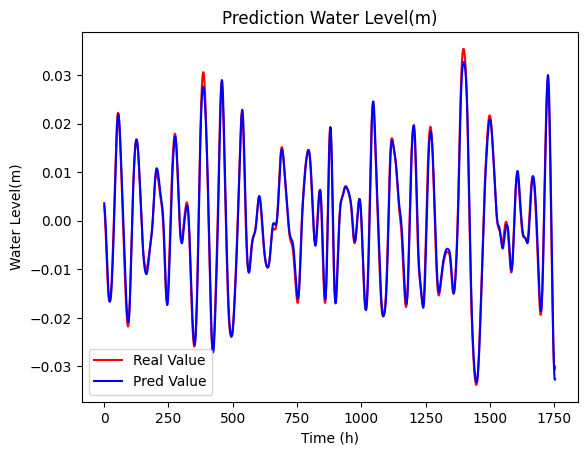

MSE: 1.5546807554815887e-06
MAE: 0.001018049496720768
R²: 0.9911716780636608
RMSE: 0.0012468683793735362
pred_finally: [ 0.00359056  0.00307499  0.00244928 ... -0.03250729 -0.03276008
 -0.03261795]
prediction_result: [ 0.00359056  0.00307499  0.00244928 ... -0.03250729 -0.03276008
 -0.03261795]
lstm_y_turs: [ 0.00289506  0.00226593  0.00151431 ... -0.03069258 -0.03055194
 -0.03005522]
-------------------------- 7 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 7 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0334 - val_loss: 0.0128
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 6.7848e-04
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 1.3335e-04 - val_loss: 2.8016e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 6.8754e-05 - val_loss: 1.8960e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 5.5595e-05 - val_loss: 1.4343e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 5.1157e-05 - val_loss: 1.2506e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 4.9401e-05 - val_loss: 1.1898e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 4.8040e-05 - val_loss: 1.1859e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 4.7664e-05 - val_loss: 1.1072e-04
Epoch 10/30
110/110 [==============================

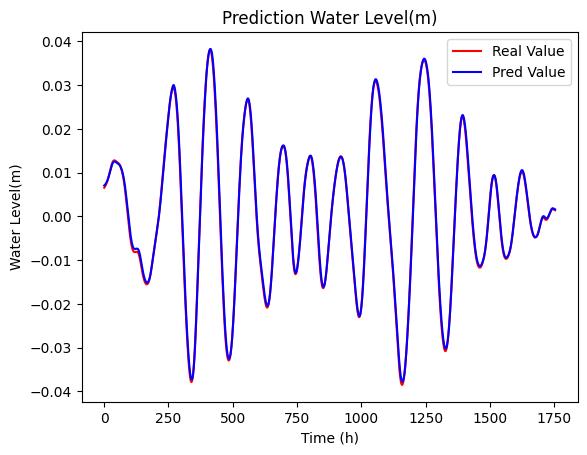

MSE: 5.178083681839245e-07
MAE: 0.0005851303445371653
R²: 0.9982521870428825
RMSE: 0.0007195890272814925
pred_finally: [0.0070669  0.00711101 0.00716356 ... 0.00164124 0.00161341 0.00159585]
prediction_result: [0.0070669  0.00711101 0.00716356 ... 0.00164124 0.00161341 0.00159585]
lstm_y_turs: [0.00654777 0.00662276 0.00670688 ... 0.00144703 0.00142237 0.00140782]
-------------------------- 8 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 8 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0454 - val_loss: 0.0243
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0093
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 6.7627e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 7.0430e-05 - val_loss: 2.5257e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 4.4755e-05 - val_loss: 2.5787e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 4.1267e-05 - val_loss: 2.7228e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 3.8889e-05 - val_loss: 2.9441e-04
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 3.7200e-05 - val_loss: 3.0332e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 3.5140e-05 - val_loss: 3.3001e-04
Epoch 10/30
110/110 [==============================] - 0s 3

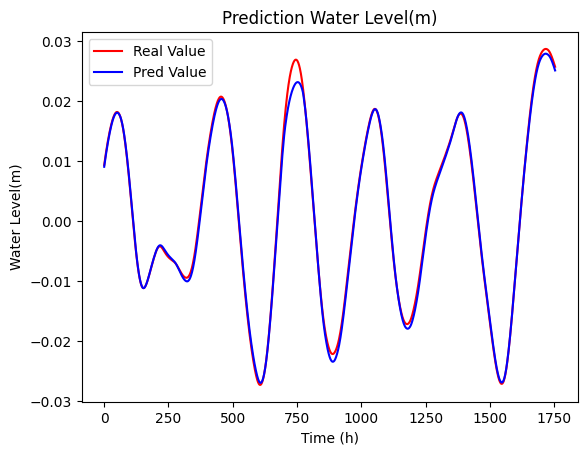

MSE: 7.287703197386733e-07
MAE: 0.0005541348231027023
R²: 0.9969076708521805
RMSE: 0.0008536804552867972
pred_finally: [0.00907754 0.0093892  0.00969649 ... 0.02540847 0.02527198 0.02513274]
prediction_result: [0.00907754 0.0093892  0.00969649 ... 0.02540847 0.02527198 0.02513274]
lstm_y_turs: [0.00937595 0.00968789 0.00999509 ... 0.02603483 0.02589524 0.02575283]
-------------------------- 9 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 9 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 3ms/step - loss: 0.0500 - val_loss: 0.0018
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 2.2831e-04
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 5.7994e-05 - val_loss: 9.3621e-05
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 3.2068e-05 - val_loss: 9.2637e-05
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 3.0547e-05 - val_loss: 8.3321e-05
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 2.9479e-05 - val_loss: 7.1318e-05
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 2.7645e-05 - val_loss: 8.0454e-05
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 2.6149e-05 - val_loss: 7.9549e-05
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 2.4837e-05 - val_loss: 6.9717e-05
Epoch 10/30
110/110 [==============================

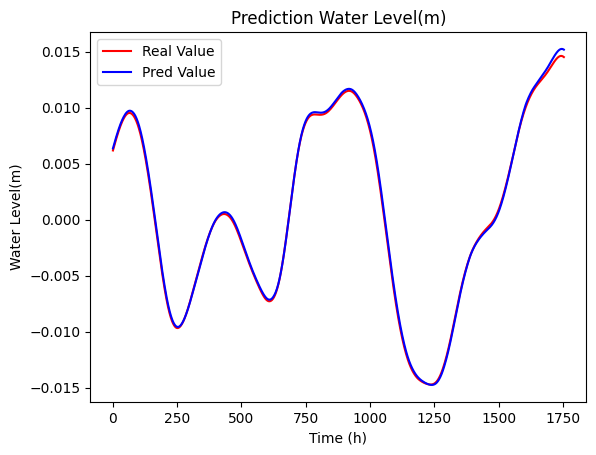

MSE: 4.528715819010048e-08
MAE: 0.00017974258352080013
R²: 0.9993549352566927
RMSE: 0.00021280779635647864
pred_finally: [0.00635334 0.00643625 0.00651881 ... 0.01519838 0.0151855  0.01517074]
prediction_result: [0.00635334 0.00643625 0.00651881 ... 0.01519838 0.0151855  0.01517074]
lstm_y_turs: [0.00616914 0.00625326 0.00633703 ... 0.01454221 0.01452534 0.01450667]
-------------------------- 10 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 10 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 3ms/step - loss: 0.0636 - val_loss: 0.0043
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 6.3401e-04
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 2.4535e-04 - val_loss: 4.2710e-04
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 7.1529e-05 - val_loss: 4.2231e-04
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 4.8805e-05 - val_loss: 3.0191e-04
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 3.7478e-05 - val_loss: 2.6672e-04
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 3.0402e-05 - val_loss: 2.4675e-04
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 2.5110e-05 - val_loss: 2.1357e-04
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 2.1746e-05 - val_loss: 2.2280e-04
Epoch 10/30
110/110 [==============================

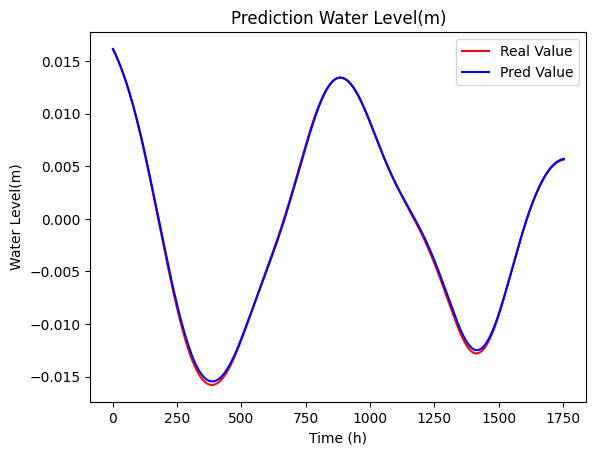

MSE: 3.7393320827008366e-08
MAE: 0.00015104062662255454
R²: 0.9995538358787385
RMSE: 0.00019337352669641304
pred_finally: [0.01612848 0.01607925 0.01602958 ... 0.00569022 0.00569482 0.00569895]
prediction_result: [0.01612848 0.01607925 0.01602958 ... 0.00569022 0.00569482 0.00569895]
lstm_y_turs: [0.01614358 0.01609393 0.01604381 ... 0.00562184 0.00562614 0.00562996]
-------------------------- 11 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 11 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.0908 - val_loss: 0.0128
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0089
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 1.4167e-04 - val_loss: 0.0031
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 4.5748e-05 - val_loss: 0.0019
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 2.9398e-05 - val_loss: 0.0015
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 2.4264e-05 - val_loss: 0.0015
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 2.1397e-05 - val_loss: 0.0014
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 1.9457e-05 - val_loss: 0.0012
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 1.8225e-05 - val_loss: 0.0012
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 1.6914e-

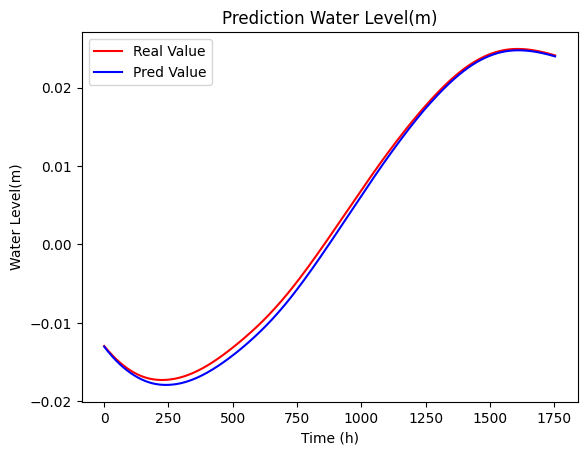

MSE: 4.373923066620978e-07
MAE: 0.0005779254617951068
R²: 0.9983058299331686
RMSE: 0.0006613564142443148
pred_finally: [-0.01304482 -0.01308739 -0.01312976 ...  0.02400503  0.02399549
  0.02398592]
prediction_result: [-0.01304482 -0.01308739 -0.01312976 ...  0.02400503  0.02399549
  0.02398592]
lstm_y_turs: [-0.01295754 -0.012998   -0.01303826 ...  0.02413169  0.02412212
  0.02411251]
-------------------------- 12 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 12 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 3ms/step - loss: 0.1378 - val_loss: 0.0758
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0112
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 8.1479e-05 - val_loss: 0.0089
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 6.6928e-05 - val_loss: 0.0082
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 5.7699e-05 - val_loss: 0.0076
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 5.0132e-05 - val_loss: 0.0072
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 4.3692e-05 - val_loss: 0.0068
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 3.7431e-05 - val_loss: 0.0065
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 3.1867e-05 - val_loss: 0.0061
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 2.6773e-

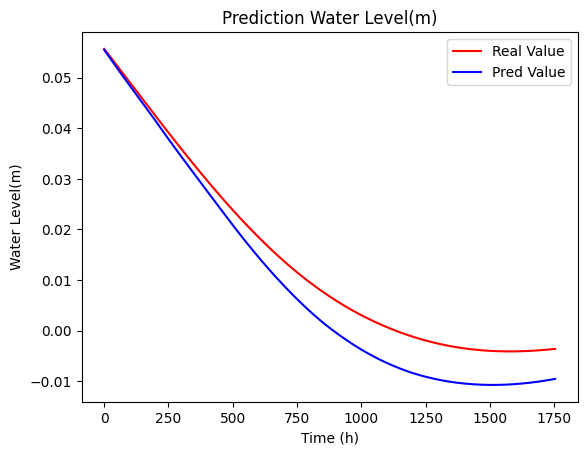

MSE: 2.8631357809760544e-05
MAE: 0.004783920346166166
R²: 0.9147554218442724
RMSE: 0.0053508277686504305
pred_finally: [ 0.05552744  0.05545504  0.05538265 ... -0.00958948 -0.00958024
 -0.00957097]
prediction_result: [ 0.05552744  0.05545504  0.05538265 ... -0.00958948 -0.00958024
 -0.00957097]
lstm_y_turs: [ 0.05570389  0.05563788  0.05557185 ... -0.00364232 -0.00363695
 -0.00363155]
-------------------------- 13 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 13 ------------------------------
Epoch 1/30


<timed exec>:75: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


110/110 [==============================] - 1s 4ms/step - loss: 0.1396 - val_loss: 0.0091
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 3.6156e-04 - val_loss: 0.0016
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 2.8315e-05 - val_loss: 0.0013
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 5.1162e-06 - val_loss: 0.0012
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 4.1774e-06 - val_loss: 0.0012
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 4.0452e-06 - val_loss: 0.0012
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 3.9395e-06 - val_loss: 0.0012
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 3.7663e-06 - val_loss: 0.0012
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 3.6154e-

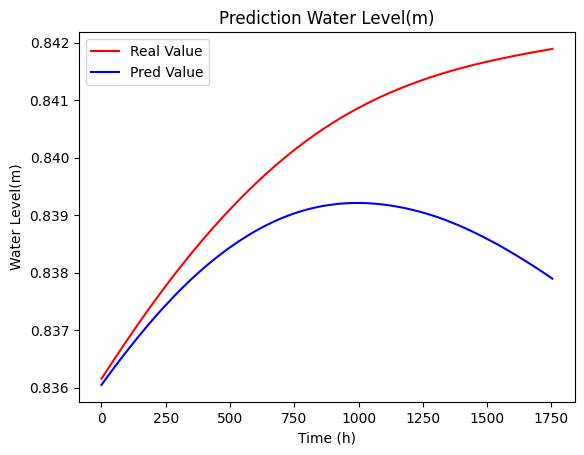

MSE: 3.8258211780858995e-06
MAE: 0.0015925510904522778
R²: -0.3944111975314464
RMSE: 0.0019559706485747425
pred_finally: [0.8360484  0.8360546  0.8360608  ... 0.8379019  0.83789885 0.83789575]
prediction_result: [0.8360484  0.8360546  0.8360608  ... 0.8379019  0.83789885 0.83789575]
lstm_y_turs: [0.83615522 0.8361621  0.83616896 ... 0.84188779 0.84188854 0.84188928]
CPU times: total: 1h 24min 32s
Wall time: 21min 42s


In [5]:
%%time
import tensorflow as tf

# Check if GPU is available and set the GPU device
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
imf_choose = 0
finally_rsult = []
finally_y_true = []
#int(len(IMF)/6)
for imf_run in range(int(len(IMF) / 6)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+6][:]
    imf_choose = imf_choose + 6
    # imf_choose = imf_choose + 6
    print('--------------------------',imf_run,'--------------------------')
    # IMF[imf_run] = ALL_Factor_IMF
    # print("ALL_Factor_IMF:",ALL_Factor_IMF)
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)
    # print(IMF_Input)

    #[AT,Baro,WD,WG,WL,WS]
    IMF_Input
    df_IMF = pd.DataFrame(IMF_Input)
    # df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF = df_IMF[['WS','WL','WG','AT','Baro','WL']]
    # print(df_IMF)

    # 数据范围过大，对数据进行归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data
    df_training, df_testing = splitData(df, 0.2)
    print(df_training.shape)
    print(df_testing.shape)

    def createXY(dataset, n_past):
        data_X = []
        data_Y = []
        for i in range(n_past, len(dataset)):
            data_X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            data_Y.append(dataset[i, 5])

        return np.array(data_X), np.array(data_Y)


    trainX, trainY = createXY(df_training, 1)
    testX, testY = createXY(df_testing, 1)

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)
    print('----------------------------',imf_run,'------------------------------')

    def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
        model = Sequential()
        model.add(LSTM(200, activation='relu', input_shape=(1, 6)))
        # optimizer = Adam()  # 设置为您希望的学习率
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mse')
        return model


    N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [30, 50]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=N_LSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, 6)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

## Stack LSTM

CPU times: total: 0 ns
Wall time: 0 ns
-------------------------- 0 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 0 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 7ms/step - loss: 0.0784 - val_loss: 0.0042
Epoch 2/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0042 - val_loss: 0.0023
Epoch 3/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 4/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 9/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 10/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 11/3

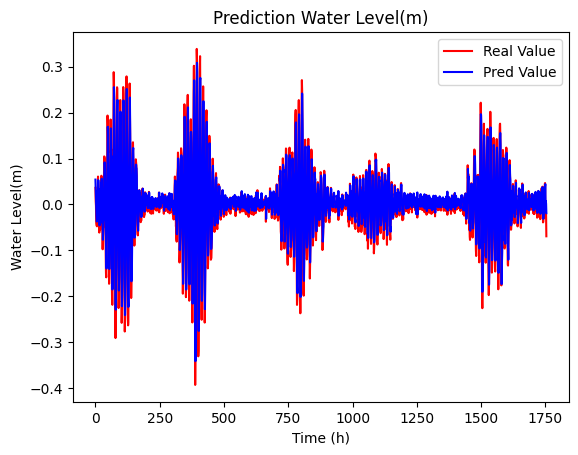

MSE: 0.0017780686835426618
MAE: 0.02898715549638471
R²: 0.7198496444740394
RMSE: 0.04216715171247237
pred_finally: [ 0.05418467  0.03404444  0.00944054 ...  0.00714384  0.00134097
 -0.01895881]
prediction_result: [ 0.05418467  0.03404444  0.00944054 ...  0.00714384  0.00134097
 -0.01895881]
lstm_y_turs: [ 0.03621333  0.00732426 -0.00296509 ... -0.00431312 -0.02566993
 -0.06919002]
-------------------------- 1 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 1 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.1099 - val_loss: 0.0050
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0047
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0039
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 11/3

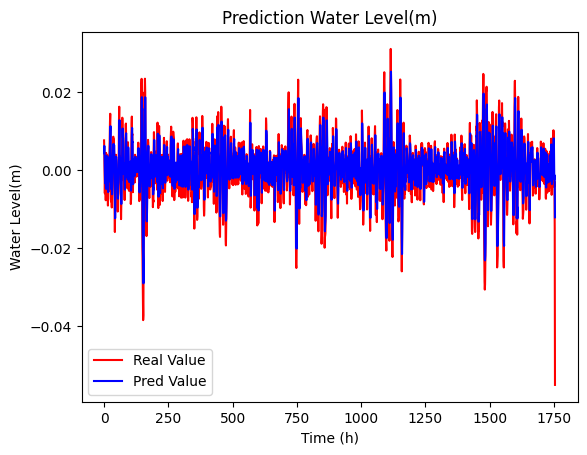

MSE: 2.587753833523707e-05
MAE: 0.003925432623122676
R²: 0.5561366115369185
RMSE: 0.005086996985966974
pred_finally: [ 0.00438736  0.00624055  0.00381021 ... -0.00228793 -0.00135864
 -0.01208876]
prediction_result: [ 0.00438736  0.00624055  0.00381021 ... -0.00228793 -0.00135864
 -0.01208876]
lstm_y_turs: [ 0.00767001  0.00431724 -0.0008971  ... -0.00290483 -0.01492227
 -0.05513317]
-------------------------- 2 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 2 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 2s 6ms/step - loss: 0.0800 - val_loss: 0.0166
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.0106
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.0105
Epoch 4/30
110/110 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0104
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.0104
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0091 - val_loss: 0.0102
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0091 - val_loss: 0.0102
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0091 - val_loss: 0.0102
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.0102

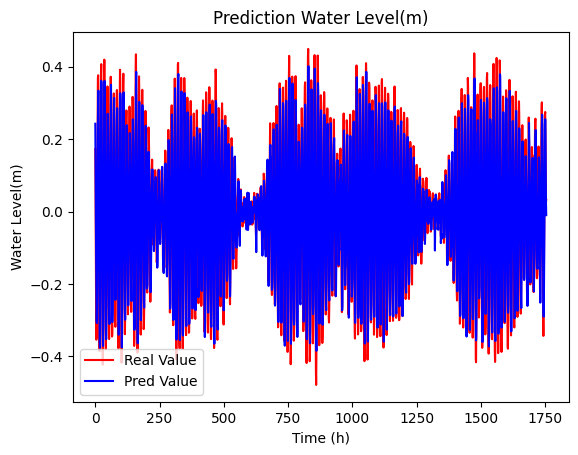

MSE: 0.01027044582937388
MAE: 0.0851260550552602
R²: 0.7631581969558422
RMSE: 0.10134320810677881
pred_finally: [ 0.24260926  0.10799825 -0.02832795 ...  0.13389473  0.02484538
 -0.00981472]
prediction_result: [ 0.24260926  0.10799825 -0.02832795 ...  0.13389473  0.02484538
 -0.00981472]
lstm_y_turs: [ 0.17250122  0.0198994  -0.1330869  ...  0.09810884  0.0262316
  0.0319723 ]
-------------------------- 3 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 3 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0660 - val_loss: 0.0093
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 7/30
110/110 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 10/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 11/3

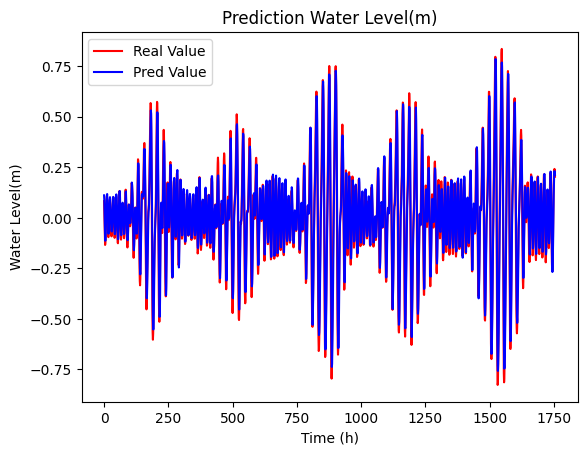

MSE: 0.006499628426152131
MAE: 0.06472335161177481
R²: 0.8968060584013374
RMSE: 0.0806202730468716
pred_finally: [0.11131208 0.08605643 0.02768705 ... 0.23155026 0.22666258 0.2119517 ]
prediction_result: [0.11131208 0.08605643 0.02768705 ... 0.23155026 0.22666258 0.2119517 ]
lstm_y_turs: [ 0.08270439  0.02838551 -0.04067162 ...  0.24199877  0.23604557
  0.2032358 ]
-------------------------- 4 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 4 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0791 - val_loss: 0.0162
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0043
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0043
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0041
Epoch 11/3

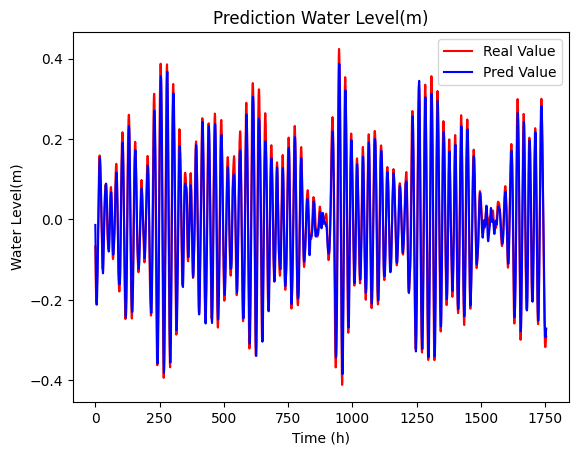

MSE: 0.0015267019210027327
MAE: 0.031529406023747576
R²: 0.9410901717275197
RMSE: 0.03907303316870515
pred_finally: [-0.01370921 -0.06796286 -0.12062695 ... -0.28896388 -0.28073537
 -0.2714573 ]
prediction_result: [-0.01370921 -0.06796286 -0.12062695 ... -0.28896388 -0.28073537
 -0.2714573 ]
lstm_y_turs: [-0.06733701 -0.11840432 -0.1630385  ... -0.3098935  -0.30138717
 -0.29206131]
-------------------------- 5 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 5 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 3s 6ms/step - loss: 0.0648 - val_loss: 0.0042
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 5.3890e-04
Epoch 3/30
110/110 [==============================] - 1s 5ms/step - loss: 5.3036e-04 - val_loss: 2.4929e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 4.1527e-04 - val_loss: 2.6709e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 3.8134e-04 - val_loss: 2.4047e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 3.5927e-04 - val_loss: 2.3991e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 3.5335e-04 - val_loss: 2.7946e-04
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 3.5181e-04 - val_loss: 2.6931e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 3.5554e-04 - val_loss: 2.2836e-04
Epoch 10/30
110/110 [==============================

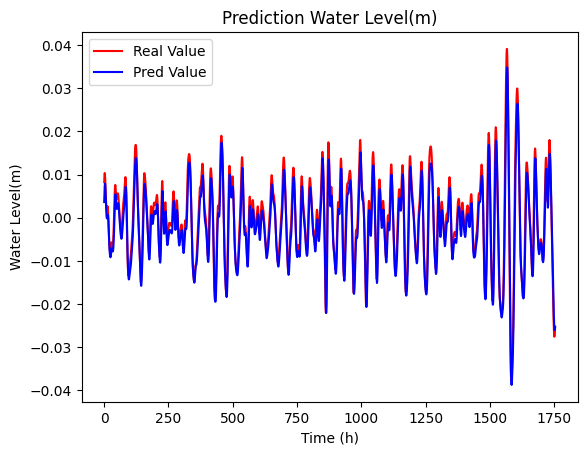

MSE: 6.418618293032658e-06
MAE: 0.0020481417148199483
R²: 0.9308597371583858
RMSE: 0.0025334992190708602
pred_finally: [ 0.00363083  0.00584763  0.00730803 ... -0.02600472 -0.0258527
 -0.0252407 ]
prediction_result: [ 0.00363083  0.00584763  0.00730803 ... -0.02600472 -0.0258527
 -0.0252407 ]
lstm_y_turs: [ 0.00821499  0.00975218  0.01035952 ... -0.02732664 -0.02658865
 -0.0254359 ]
-------------------------- 6 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 6 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.0592 - val_loss: 0.0104
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 5.8209e-04 - val_loss: 7.6824e-04
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 2.5192e-04 - val_loss: 4.7963e-04
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 1.6837e-04 - val_loss: 3.7219e-04
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 1.4148e-04 - val_loss: 3.3746e-04
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 1.3698e-04 - val_loss: 2.9607e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 1.3174e-04 - val_loss: 2.8773e-04
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 1.2574e-04 - val_loss: 2.9117e-04
Epoch 10/30
110/110 [==============================] - 

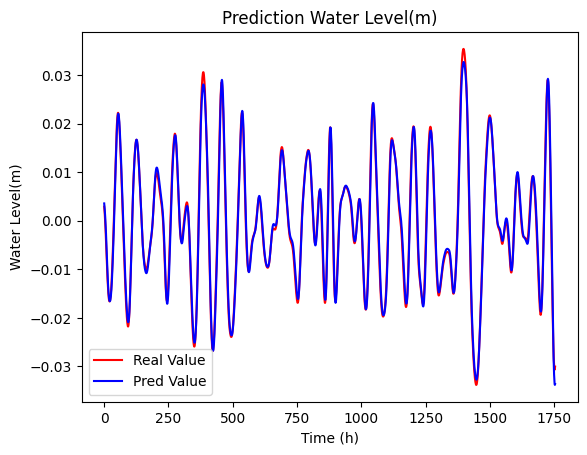

MSE: 1.480645071826549e-06
MAE: 0.000996148061616054
R²: 0.9915920928965962
RMSE: 0.001216817600064426
pred_finally: [ 0.00356777  0.00302911  0.00238186 ... -0.03356035 -0.03381726
 -0.03364122]
prediction_result: [ 0.00356777  0.00302911  0.00238186 ... -0.03356035 -0.03381726
 -0.03364122]
lstm_y_turs: [ 0.00289506  0.00226593  0.00151431 ... -0.03069258 -0.03055194
 -0.03005522]
-------------------------- 7 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 7 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0580 - val_loss: 0.0154
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 3/30
110/110 [==============================] - 1s 5ms/step - loss: 2.7234e-04 - val_loss: 0.0012
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 1.7312e-04 - val_loss: 7.6377e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 1.3363e-04 - val_loss: 6.2927e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 1.0794e-04 - val_loss: 4.1613e-04
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 9.2662e-05 - val_loss: 3.2968e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 8.0000e-05 - val_loss: 2.6561e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 7.4475e-05 - val_loss: 2.3662e-04
Epoch 10/30
110/110 [==============================] - 1s 5

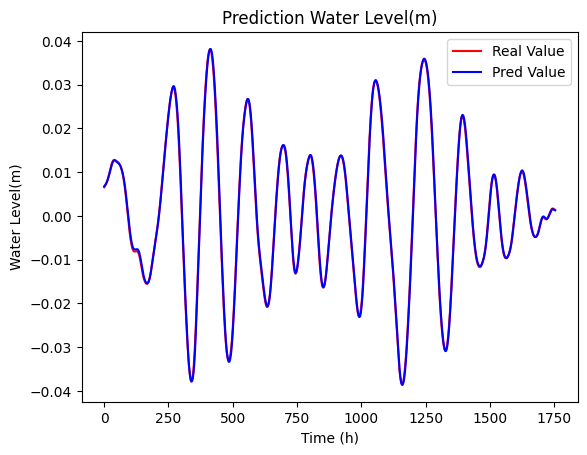

MSE: 4.820299811185283e-07
MAE: 0.0005635863410720558
R²: 0.9983729535896206
RMSE: 0.0006942837900444805
pred_finally: [0.00677587 0.0068343  0.00690102 ... 0.0013037  0.00127273 0.00125155]
prediction_result: [0.00677587 0.0068343  0.00690102 ... 0.0013037  0.00127273 0.00125155]
lstm_y_turs: [0.00654777 0.00662276 0.00670688 ... 0.00144703 0.00142237 0.00140782]
-------------------------- 8 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 8 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0592 - val_loss: 0.0190
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0039 - val_loss: 0.0025
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 4.0158e-04 - val_loss: 6.5294e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 2.2207e-04 - val_loss: 4.3641e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 1.8789e-04 - val_loss: 3.6461e-04
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 1.5857e-04 - val_loss: 2.8740e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 1.0598e-04 - val_loss: 2.2528e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 5.5165e-05 - val_loss: 2.0628e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 3.0317e-05 - val_loss: 2.2309e-04
Epoch 10/30
110/110 [==============================] - 

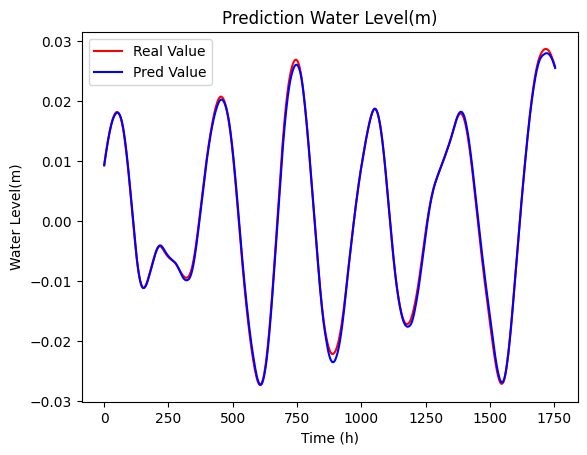

MSE: 2.5846916036028116e-07
MAE: 0.0003787773209452012
R²: 0.9989032597833002
RMSE: 0.0005083986234838576
pred_finally: [0.00930517 0.00961328 0.00991725 ... 0.02582468 0.02568594 0.02554401]
prediction_result: [0.00930517 0.00961328 0.00991725 ... 0.02582468 0.02568594 0.02554401]
lstm_y_turs: [0.00937595 0.00968789 0.00999509 ... 0.02603483 0.02589524 0.02575283]
-------------------------- 9 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 9 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0582 - val_loss: 0.0023
Epoch 2/30
110/110 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 3.9647e-04
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 1.3240e-04 - val_loss: 2.7373e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 7.2927e-05 - val_loss: 2.1849e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 5.2530e-05 - val_loss: 1.8474e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 4.2001e-05 - val_loss: 1.4453e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 3.6003e-05 - val_loss: 1.1232e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 3.1898e-05 - val_loss: 9.7040e-05
Epoch 9/30
110/110 [==============================] - 0s 5ms/step - loss: 2.7162e-05 - val_loss: 7.7996e-05
Epoch 10/30
110/110 [==============================

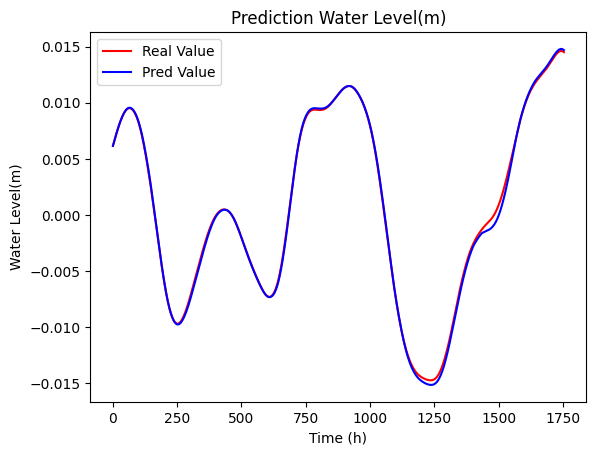

MSE: 6.870363179607369e-08
MAE: 0.00017663754444238787
R²: 0.9990213938701391
RMSE: 0.00026211377643320025
pred_finally: [0.00615362 0.00623723 0.00632055 ... 0.01473105 0.01471441 0.01469588]
prediction_result: [0.00615362 0.00623723 0.00632055 ... 0.01473105 0.01471441 0.01469588]
lstm_y_turs: [0.00616914 0.00625326 0.00633703 ... 0.01454221 0.01452534 0.01450667]
-------------------------- 10 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 10 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 3s 6ms/step - loss: 0.0958 - val_loss: 0.0062
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 4.6178e-04
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 2.9327e-04 - val_loss: 2.7205e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 1.0997e-04 - val_loss: 2.9468e-04
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 6.9920e-05 - val_loss: 2.5542e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 5.5162e-05 - val_loss: 3.0007e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 4.2813e-05 - val_loss: 3.5989e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 3.7606e-05 - val_loss: 3.6424e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 3.2472e-05 - val_loss: 3.8546e-04
Epoch 10/30
110/110 [==============================

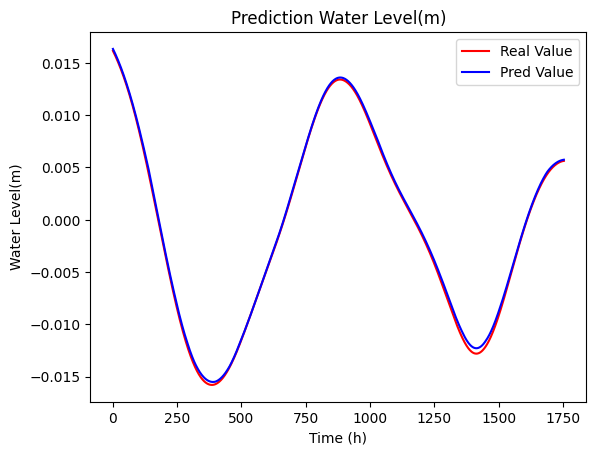

MSE: 6.85178878033626e-08
MAE: 0.00022589807712732128
R²: 0.9991824683519309
RMSE: 0.0002617592172271353
pred_finally: [0.01632928 0.01627903 0.01622831 ... 0.00573346 0.00573742 0.00574093]
prediction_result: [0.01632928 0.01627903 0.01622831 ... 0.00573346 0.00573742 0.00574093]
lstm_y_turs: [0.01614358 0.01609393 0.01604381 ... 0.00562184 0.00562614 0.00562996]
-------------------------- 11 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 11 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.1259 - val_loss: 0.0204
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 2.0010e-04 - val_loss: 0.0014
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 5.7314e-05 - val_loss: 0.0010
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 3.3375e-05 - val_loss: 9.5452e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 2.2636e-05 - val_loss: 9.2201e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 1.6666e-05 - val_loss: 9.2842e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 1.3605e-05 - val_loss: 8.4973e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 1.1202e-05 - val_loss: 8.5987e-04
Epoch 10/30
110/110 [==============================] - 0s 4ms/s

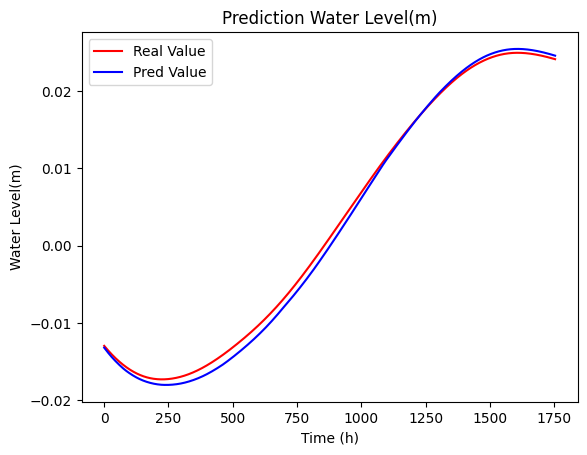

MSE: 6.39075738705142e-07
MAE: 0.0007025593517877175
R²: 0.9975246409905677
RMSE: 0.0007994221279806696
pred_finally: [-0.01319351 -0.01323774 -0.01328178 ...  0.02459045  0.02458041
  0.02457033]
prediction_result: [-0.01319351 -0.01323774 -0.01328178 ...  0.02459045  0.02458041
  0.02457033]
lstm_y_turs: [-0.01295754 -0.012998   -0.01303826 ...  0.02413169  0.02412212
  0.02411251]
-------------------------- 12 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 12 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.1451 - val_loss: 0.0554
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 7.3784e-04 - val_loss: 0.0250
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 3.2014e-04 - val_loss: 0.0224
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 2.4849e-04 - val_loss: 0.0199
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 1.8637e-04 - val_loss: 0.0176
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 1.0266e-04 - val_loss: 0.0119
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 1.4676e-05 - val_loss: 0.0077
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 3.5865e-06 - val_loss: 0.0072
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5125e-06 - val_loss: 0.0071
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 2.27

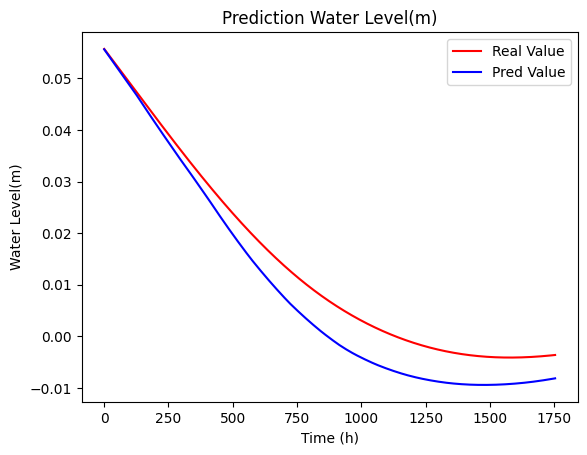

MSE: 2.7627101977266815e-05
MAE: 0.004777855828127804
R²: 0.9177454080464696
RMSE: 0.005256148968329076
pred_finally: [ 0.05562015  0.05554919  0.05547824 ... -0.00817847 -0.00816973
 -0.00816095]
prediction_result: [ 0.05562015  0.05554919  0.05547824 ... -0.00817847 -0.00816973
 -0.00816095]
lstm_y_turs: [ 0.05570389  0.05563788  0.05557185 ... -0.00364232 -0.00363695
 -0.00363155]
-------------------------- 13 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 13 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23292\1429973890.py:106: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.1601 - val_loss: 0.0031
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0014 - val_loss: 6.3559e-04
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 6.4210e-05 - val_loss: 3.9901e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 1.1467e-05 - val_loss: 3.9993e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 6.9541e-06 - val_loss: 4.2819e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 4.2140e-06 - val_loss: 4.4775e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 2.9050e-06 - val_loss: 4.4785e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 2.1175e-06 - val_loss: 4.8280e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 1.6146e-06 - val_loss: 4.9846e-04
Epoch 10/30
110/110 [==============================

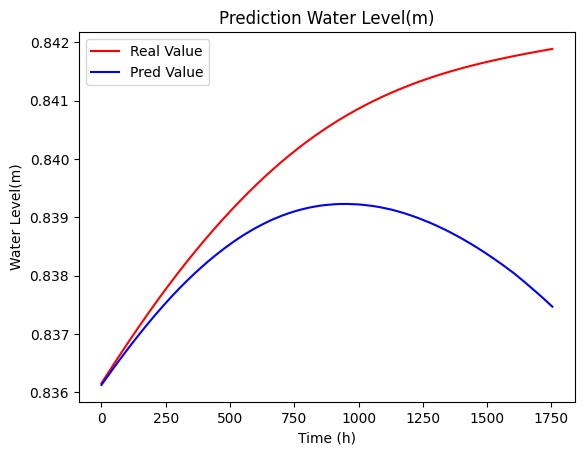

MSE: 4.251957056486064e-06
MAE: 0.0016186096977439095
R²: -0.5497265175246242
RMSE: 0.0020620274140966373
pred_finally: [0.8361259  0.8361321  0.8361384  ... 0.8374767  0.83747256 0.83746845]
prediction_result: [0.8361259  0.8361321  0.8361384  ... 0.8374767  0.83747256 0.83746845]
lstm_y_turs: [0.83615522 0.8361621  0.83616896 ... 0.84188779 0.84188854 0.84188928]


In [42]:
%time
# def Stack_LSTM():
#         model = Sequential()
#         model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
#         model.add(LSTM(100, activation='relu'))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Two = 'Stack_LSTM_Model'
#     Stack_LSTM_Model.fit(trainX,trainY)
#     Result_Ana(Stack_LSTM_Model,6,Model_Name_Two)
#
#     #BiLSTM
#     def BiLSTM():
#         model = Sequential()
#         model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 6)))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     # history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
#     BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Three = 'BiLSTM_Model'
#     BiLSTM_Model.fit(trainX,trainY)
#     Result_Ana(BiLSTM_Model,6,Model_Name_Three)

import tensorflow as tf

# Check if GPU is available and set the GPU device
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
imf_choose = 0
finally_rsult = []
finally_y_true = []
#int(len(IMF)/6)
for imf_run in range(int(len(IMF) / 6)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+6][:]
    imf_choose = imf_choose + 6
    # imf_choose = imf_choose + 6
    print('--------------------------',imf_run,'--------------------------')
    # IMF[imf_run] = ALL_Factor_IMF
    # print("ALL_Factor_IMF:",ALL_Factor_IMF)
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)
    # print(IMF_Input)

    #[AT,Baro,WD,WG,WL,WS]
    IMF_Input
    df_IMF = pd.DataFrame(IMF_Input)
    # df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF = df_IMF[['WS','WL','WG','AT','Baro','WL']]
    # print(df_IMF)

    # 数据范围过大，对数据进行归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data
    df_training, df_testing = splitData(df, 0.2)
    print(df_training.shape)
    print(df_testing.shape)

    def createXY(dataset, n_past):
        data_X = []
        data_Y = []
        for i in range(n_past, len(dataset)):
            data_X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            data_Y.append(dataset[i, 5])

        return np.array(data_X), np.array(data_Y)


    trainX, trainY = createXY(df_training, 1)
    testX, testY = createXY(df_testing, 1)

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)
    print('----------------------------',imf_run,'------------------------------')

    # def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
    #     model = Sequential()
    #     model.add(LSTM(200, activation='relu', input_shape=(1, 6)))
    #     # optimizer = Adam()  # 设置为您希望的学习率
    #     model.add(Dense(1))
    #     model.compile(optimizer=optimizer, loss='mse')
    #     return model
    def Stack_LSTM(optimizer='adam', batch_size=32, epochs=40):
        model = Sequential()
        model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
        model.add(LSTM(100, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mse')
        return model
    Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    # N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [30, 50]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=Stack_LSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, 6)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

## BiLSTM

CPU times: total: 0 ns
Wall time: 0 ns
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
-------------------------- 0 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 0 ------------------------------


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


Epoch 1/30
110/110 [==============================] - 2s 5ms/step - loss: 0.0341 - val_loss: 0.0037
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0021
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0017

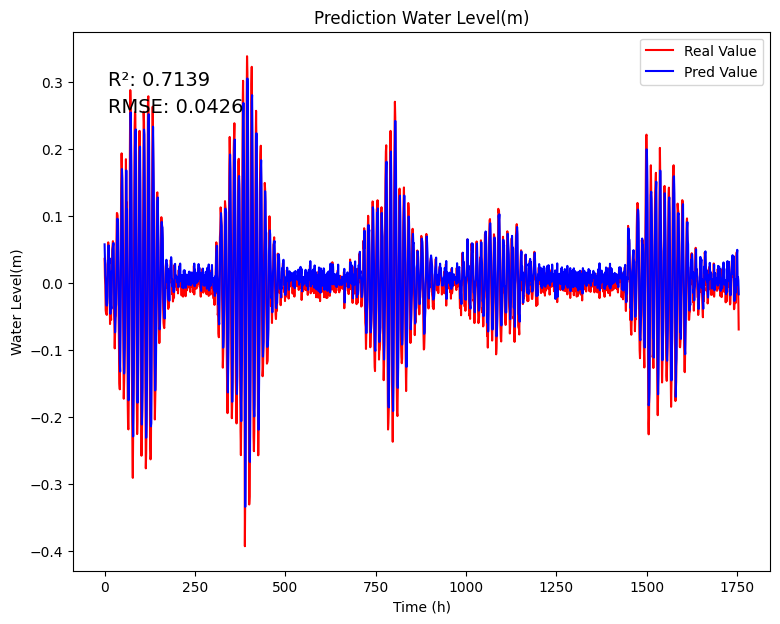

prediction_result: [ 0.05777443  0.03678704  0.01187342 ...  0.00906494  0.00371268
 -0.01674382]
lstm_y_turs: [ 0.03621333  0.00732426 -0.00296509 ... -0.00431312 -0.02566993
 -0.06919002]
-------------------------- 1 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 1 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0565 - val_loss: 0.0053
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0051
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0037
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 11/3

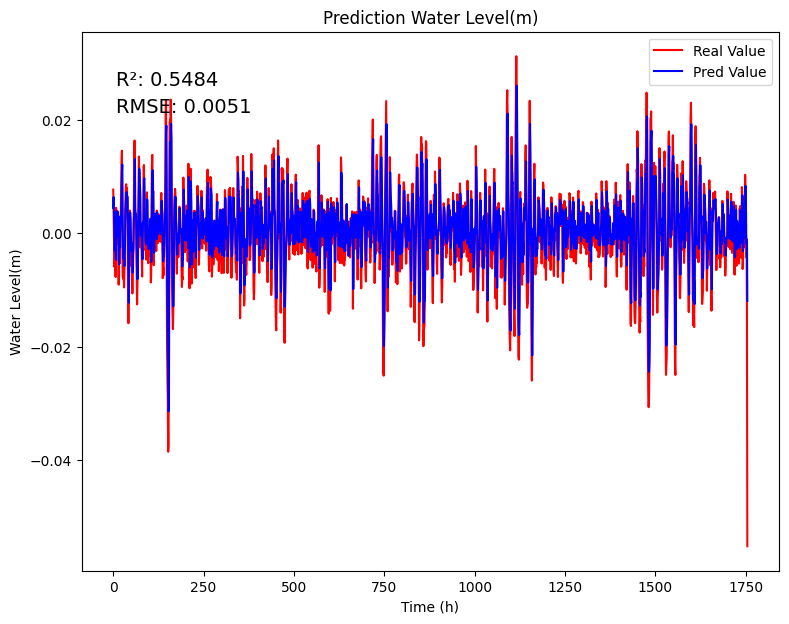

prediction_result: [ 0.00445404  0.00634953  0.00408706 ... -0.00198664 -0.00114452
 -0.01195661]
lstm_y_turs: [ 0.00767001  0.00431724 -0.0008971  ... -0.00290483 -0.01492227
 -0.05513317]
-------------------------- 2 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 2 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 5ms/step - loss: 0.0455 - val_loss: 0.0156
Epoch 2/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0104
Epoch 3/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0101
Epoch 4/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.0101
Epoch 5/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0103
Epoch 6/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0101
Epoch 7/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 8/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 9/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.0102
Epoch 10/30
110/110 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.0105
Epoch 11/3

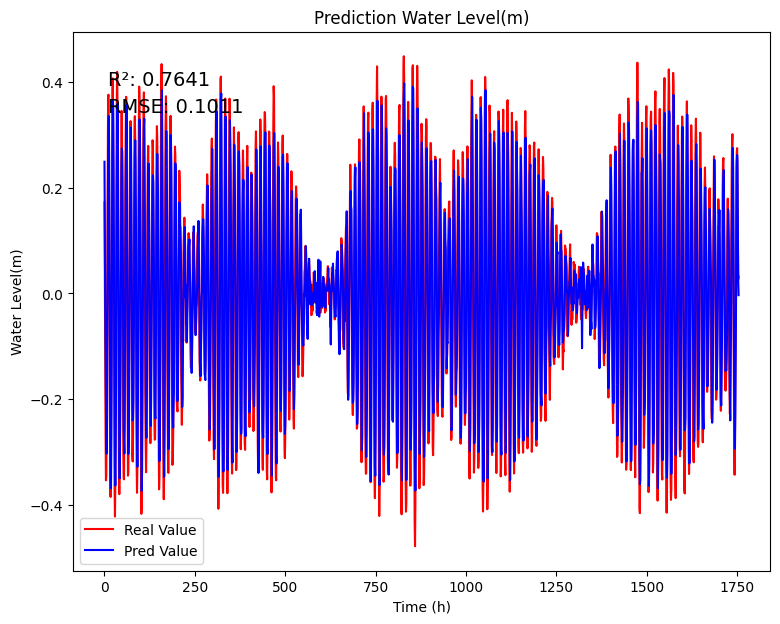

prediction_result: [ 0.24941981  0.11058852 -0.01863896 ...  0.14354298  0.02583465
 -0.00331776]
lstm_y_turs: [ 0.17250122  0.0198994  -0.1330869  ...  0.09810884  0.0262316
  0.0319723 ]
-------------------------- 3 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 3 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0421 - val_loss: 0.0097
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 11/3

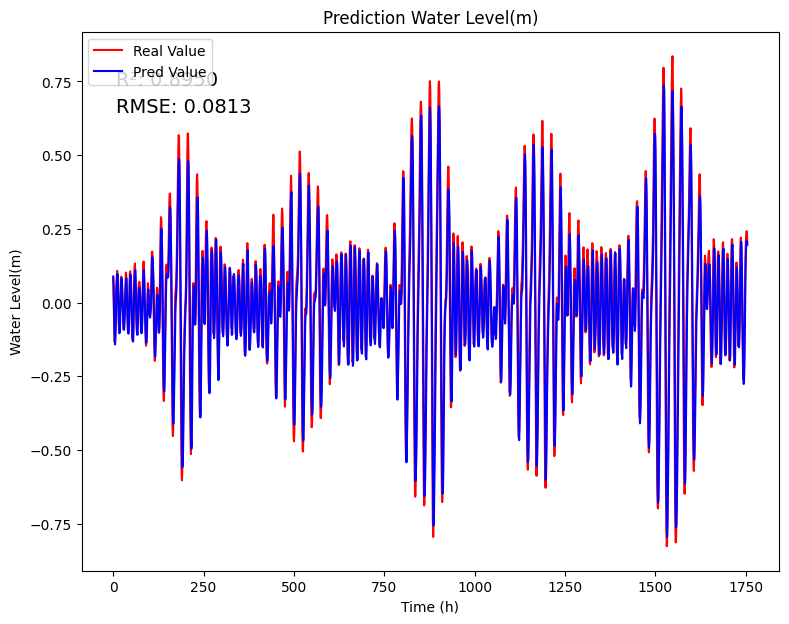

prediction_result: [0.08835986 0.06183963 0.00175799 ... 0.2097208  0.20692253 0.19498298]
lstm_y_turs: [ 0.08270439  0.02838551 -0.04067162 ...  0.24199877  0.23604557
  0.2032358 ]
-------------------------- 4 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 4 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0418 - val_loss: 0.0078
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 3/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 4/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0022 - val_loss: 0.0030
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 9/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 10/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0020 - val_loss: 0.0042
Epoch 11/3

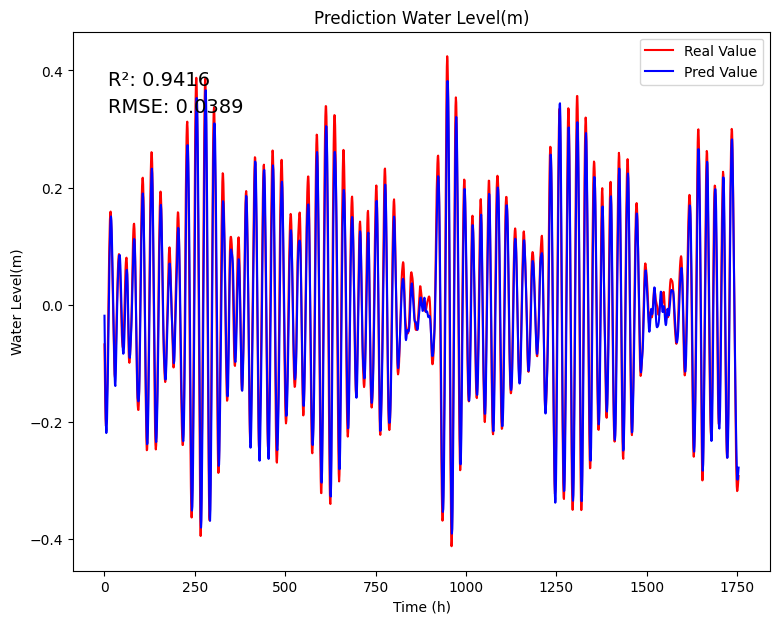

prediction_result: [-0.01849426 -0.0715931  -0.12401515 ... -0.29452476 -0.2867852
 -0.27769545]
lstm_y_turs: [-0.06733701 -0.11840432 -0.1630385  ... -0.3098935  -0.30138717
 -0.29206131]
-------------------------- 5 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 5 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0274 - val_loss: 0.0028
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 2.3523e-04
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 3.5235e-04 - val_loss: 2.4159e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 3.3769e-04 - val_loss: 2.4302e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 3.4157e-04 - val_loss: 2.1429e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 3.3589e-04 - val_loss: 2.0191e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 3.4395e-04 - val_loss: 2.3330e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 3.3450e-04 - val_loss: 1.9193e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 3.3535e-04 - val_loss: 1.9771e-04
Epoch 10/30
110/110 [==============================

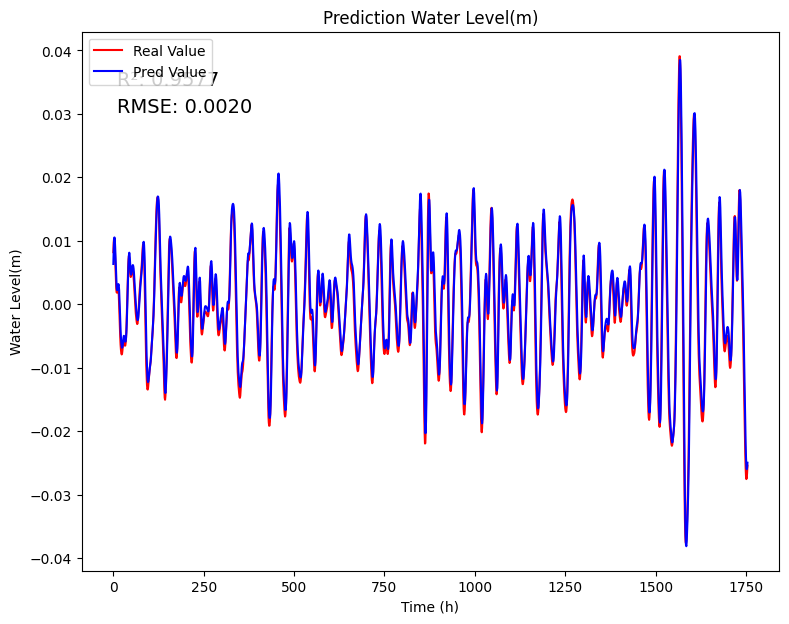

prediction_result: [ 0.00635534  0.00857053  0.01000472 ... -0.02599261 -0.02574188
 -0.02497203]
lstm_y_turs: [ 0.00821499  0.00975218  0.01035952 ... -0.02732664 -0.02658865
 -0.0254359 ]
-------------------------- 6 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 6 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 7ms/step - loss: 0.0307 - val_loss: 0.0098
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 3/30
110/110 [==============================] - 1s 5ms/step - loss: 3.7439e-04 - val_loss: 3.6508e-04
Epoch 4/30
110/110 [==============================] - 1s 5ms/step - loss: 1.3701e-04 - val_loss: 2.6904e-04
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 1.0157e-04 - val_loss: 2.1347e-04
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 9.4273e-05 - val_loss: 2.1456e-04
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 8.8623e-05 - val_loss: 2.0134e-04
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 8.7694e-05 - val_loss: 1.9733e-04
Epoch 9/30
110/110 [==============================] - 1s 5ms/step - loss: 8.6323e-05 - val_loss: 1.9200e-04
Epoch 10/30
110/110 [==============================] - 

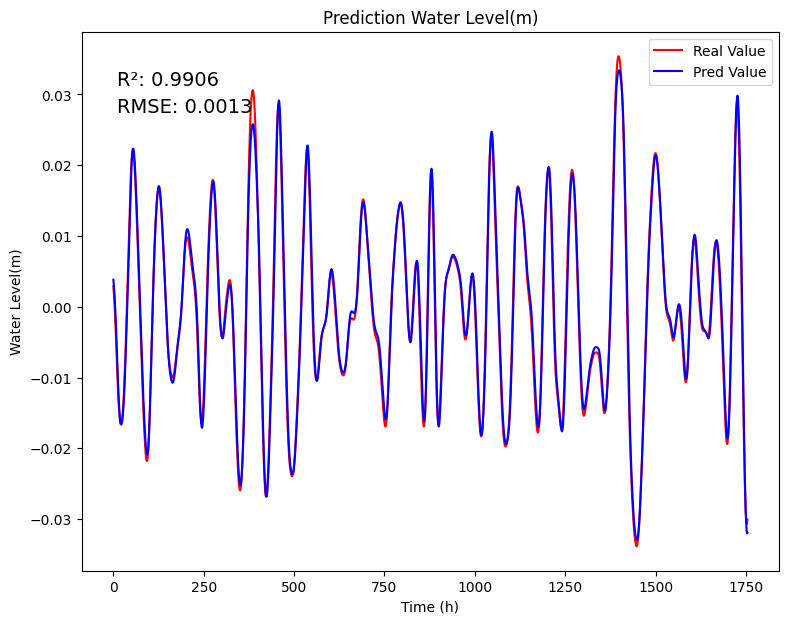

prediction_result: [ 0.00382222  0.00329441  0.00265257 ... -0.03175663 -0.03201029
 -0.0318806 ]
lstm_y_turs: [ 0.00289506  0.00226593  0.00151431 ... -0.03069258 -0.03055194
 -0.03005522]
-------------------------- 7 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 7 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 3s 7ms/step - loss: 0.0315 - val_loss: 0.0106
Epoch 2/30
110/110 [==============================] - 1s 6ms/step - loss: 0.0017 - val_loss: 4.9038e-04
Epoch 3/30
110/110 [==============================] - 1s 6ms/step - loss: 1.0209e-04 - val_loss: 2.6801e-04
Epoch 4/30
110/110 [==============================] - 1s 6ms/step - loss: 6.0725e-05 - val_loss: 1.7164e-04
Epoch 5/30
110/110 [==============================] - 1s 6ms/step - loss: 4.9380e-05 - val_loss: 1.4072e-04
Epoch 6/30
110/110 [==============================] - 1s 6ms/step - loss: 4.6847e-05 - val_loss: 1.3063e-04
Epoch 7/30
110/110 [==============================] - 1s 6ms/step - loss: 4.6091e-05 - val_loss: 1.1218e-04
Epoch 8/30
110/110 [==============================] - 1s 6ms/step - loss: 4.4629e-05 - val_loss: 1.0665e-04
Epoch 9/30
110/110 [==============================] - 1s 6ms/step - loss: 4.4198e-05 - val_loss: 1.0159e-04
Epoch 10/30
110/110 [==============================

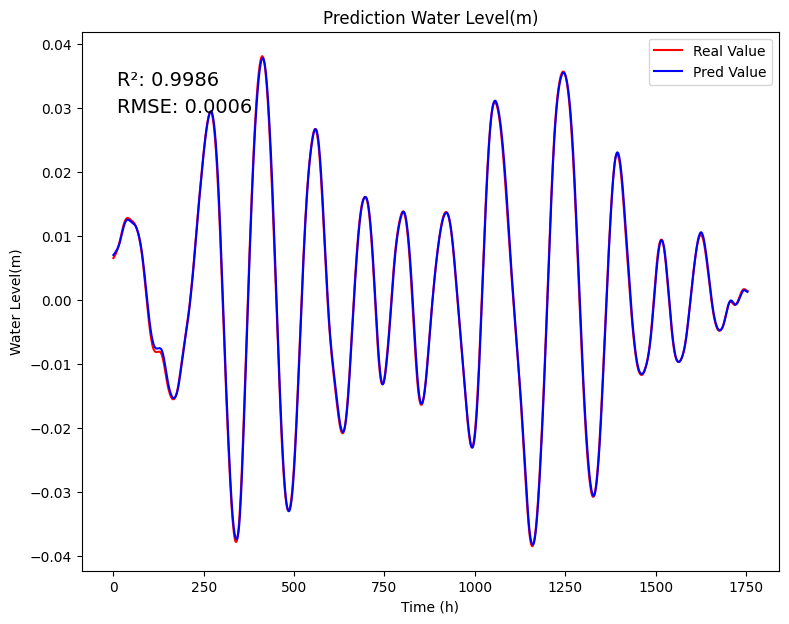

prediction_result: [0.00702224 0.00708005 0.00714664 ... 0.00131207 0.0012782  0.00125366]
lstm_y_turs: [0.00654777 0.00662276 0.00670688 ... 0.00144703 0.00142237 0.00140782]
-------------------------- 8 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 8 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0311 - val_loss: 0.0163
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 6.7192e-04
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 4.8759e-05 - val_loss: 2.1564e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 2.8755e-05 - val_loss: 2.2080e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 2.5931e-05 - val_loss: 2.3531e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 2.2949e-05 - val_loss: 2.6031e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 1.8543e-05 - val_loss: 2.8604e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 1.6077e-05 - val_loss: 2.8589e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 1.5642e-05 - val_loss: 2.8591e-04
Epoch 10/30
110/110 [==============================

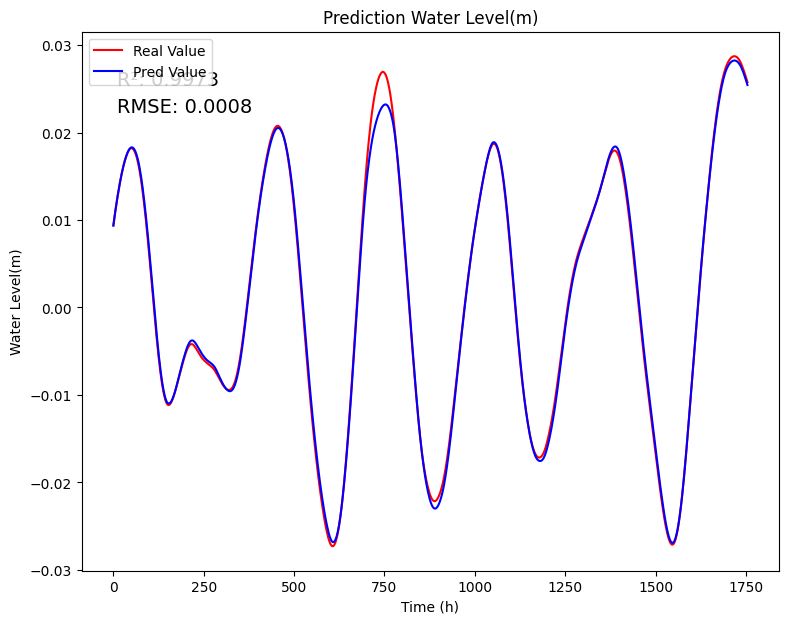

prediction_result: [0.00936444 0.00967579 0.00998281 ... 0.02570693 0.02557016 0.02543064]
lstm_y_turs: [0.00937595 0.00968789 0.00999509 ... 0.02603483 0.02589524 0.02575283]
-------------------------- 9 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 9 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0392 - val_loss: 6.4262e-04
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 6.3244e-04 - val_loss: 1.2998e-04
Epoch 3/30
110/110 [==============================] - 1s 5ms/step - loss: 3.0337e-05 - val_loss: 6.6245e-05
Epoch 4/30
110/110 [==============================] - 1s 5ms/step - loss: 2.3461e-05 - val_loss: 6.4267e-05
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 2.1325e-05 - val_loss: 6.4648e-05
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 1.9943e-05 - val_loss: 5.7389e-05
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 1.8414e-05 - val_loss: 5.3886e-05
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 1.6996e-05 - val_loss: 5.2991e-05
Epoch 9/30
110/110 [==============================] - 1s 5ms/step - loss: 1.6462e-05 - val_loss: 4.7677e-05
Epoch 10/30
110/110 [======================

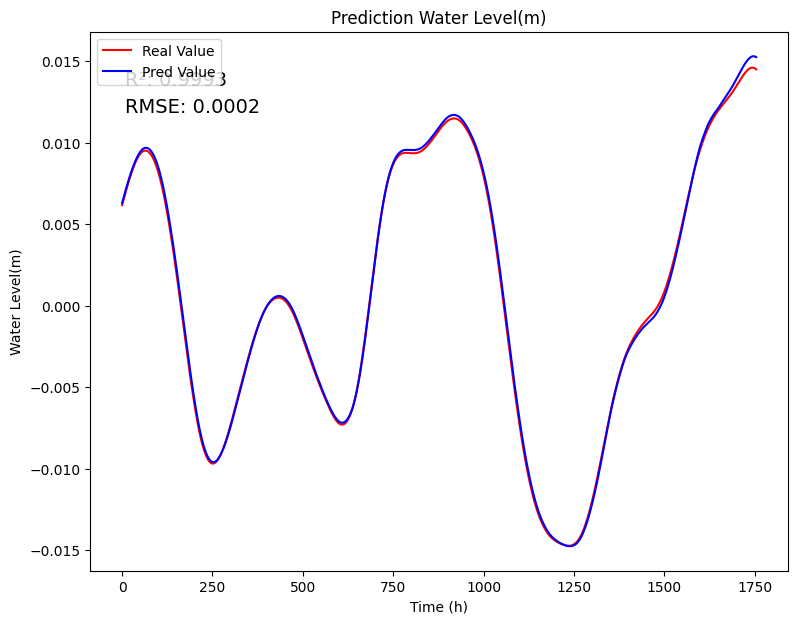

prediction_result: [0.00630058 0.0063833  0.00646566 ... 0.01528072 0.01526884 0.01525503]
lstm_y_turs: [0.00616914 0.00625326 0.00633703 ... 0.01454221 0.01452534 0.01450667]
-------------------------- 10 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 10 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.0455 - val_loss: 0.0033
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 5.2037e-04
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 1.3162e-04 - val_loss: 3.8453e-04
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 4.2037e-05 - val_loss: 2.8860e-04
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 2.9218e-05 - val_loss: 2.4800e-04
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 2.2058e-05 - val_loss: 2.3501e-04
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 1.7359e-05 - val_loss: 2.0563e-04
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 1.4515e-05 - val_loss: 1.9557e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 1.2140e-05 - val_loss: 1.9185e-04
Epoch 10/30
110/110 [==============================

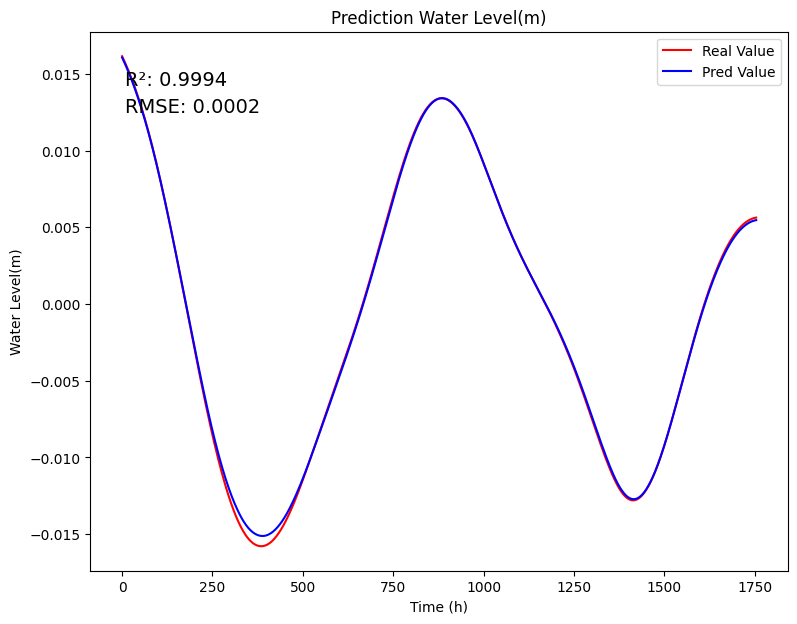

prediction_result: [0.01605593 0.01600658 0.01595677 ... 0.00545515 0.00545964 0.00546364]
lstm_y_turs: [0.01614358 0.01609393 0.01604381 ... 0.00562184 0.00562614 0.00562996]
-------------------------- 11 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 11 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 7ms/step - loss: 0.0661 - val_loss: 0.0157
Epoch 2/30
110/110 [==============================] - 1s 5ms/step - loss: 6.7056e-04 - val_loss: 0.0060
Epoch 3/30
110/110 [==============================] - 1s 5ms/step - loss: 5.4254e-05 - val_loss: 0.0017
Epoch 4/30
110/110 [==============================] - 1s 5ms/step - loss: 2.4773e-05 - val_loss: 0.0012
Epoch 5/30
110/110 [==============================] - 1s 5ms/step - loss: 1.8599e-05 - val_loss: 9.9563e-04
Epoch 6/30
110/110 [==============================] - 1s 5ms/step - loss: 1.4847e-05 - val_loss: 8.1487e-04
Epoch 7/30
110/110 [==============================] - 1s 5ms/step - loss: 1.2384e-05 - val_loss: 6.2475e-04
Epoch 8/30
110/110 [==============================] - 1s 5ms/step - loss: 1.0657e-05 - val_loss: 5.8636e-04
Epoch 9/30
110/110 [==============================] - 1s 5ms/step - loss: 9.1499e-06 - val_loss: 5.9357e-04
Epoch 10/30
110/110 [==============================] - 1s 5

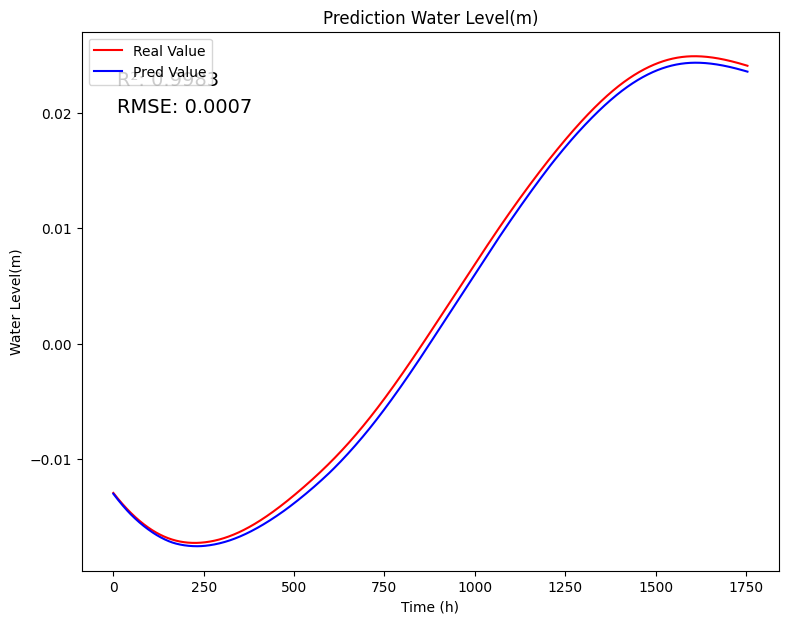

prediction_result: [-0.01303112 -0.01307271 -0.01311411 ...  0.02362022  0.02361105
  0.02360184]
lstm_y_turs: [-0.01295754 -0.012998   -0.01303826 ...  0.02413169  0.02412212
  0.02411251]
-------------------------- 12 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 12 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 6ms/step - loss: 0.1061 - val_loss: 0.0249
Epoch 2/30
110/110 [==============================] - 0s 4ms/step - loss: 1.6611e-04 - val_loss: 0.0036
Epoch 3/30
110/110 [==============================] - 0s 4ms/step - loss: 4.0457e-05 - val_loss: 0.0026
Epoch 4/30
110/110 [==============================] - 0s 4ms/step - loss: 2.9978e-05 - val_loss: 0.0020
Epoch 5/30
110/110 [==============================] - 0s 4ms/step - loss: 2.2951e-05 - val_loss: 0.0016
Epoch 6/30
110/110 [==============================] - 0s 4ms/step - loss: 1.8006e-05 - val_loss: 0.0013
Epoch 7/30
110/110 [==============================] - 0s 4ms/step - loss: 1.4033e-05 - val_loss: 0.0010
Epoch 8/30
110/110 [==============================] - 0s 4ms/step - loss: 1.1148e-05 - val_loss: 7.9913e-04
Epoch 9/30
110/110 [==============================] - 0s 4ms/step - loss: 9.1956e-06 - val_loss: 6.3959e-04
Epoch 10/30
110/110 [==============================] - 0s 4ms/step - lo

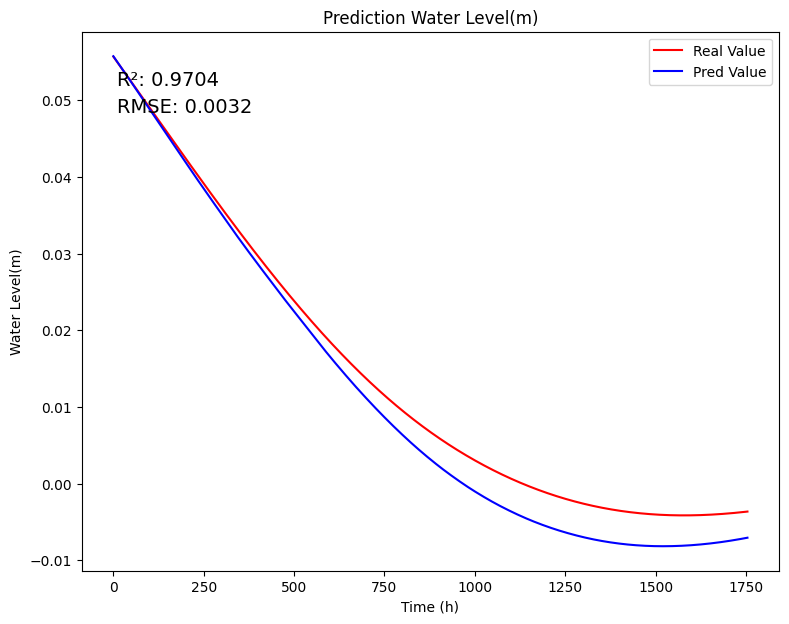

prediction_result: [ 0.05575689  0.05568917  0.05562147 ... -0.00706065 -0.00705164
 -0.0070426 ]
lstm_y_turs: [ 0.05570389  0.05563788  0.05557185 ... -0.00364232 -0.00363695
 -0.00363155]
-------------------------- 13 --------------------------
1756
(7024, 6)
(1756, 6)
trainX.Shape:---- (7023, 1, 6)
trainY.shape:---- (7023,)
testX.shape:---- (1755, 1, 6)
testY.shape:---- (1755,)
---------------------------- 13 ------------------------------
Epoch 1/30


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_1136\2130456632.py:117: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


110/110 [==============================] - 2s 7ms/step - loss: 0.0818 - val_loss: 0.0052
Epoch 2/30
110/110 [==============================] - 1s 6ms/step - loss: 6.9110e-04 - val_loss: 0.0016
Epoch 3/30
110/110 [==============================] - 1s 6ms/step - loss: 2.8442e-05 - val_loss: 0.0012
Epoch 4/30
110/110 [==============================] - 1s 6ms/step - loss: 1.3158e-05 - val_loss: 0.0012
Epoch 5/30
110/110 [==============================] - 1s 6ms/step - loss: 1.1947e-05 - val_loss: 0.0011
Epoch 6/30
110/110 [==============================] - 1s 6ms/step - loss: 1.0702e-05 - val_loss: 0.0012
Epoch 7/30
110/110 [==============================] - 1s 7ms/step - loss: 9.5163e-06 - val_loss: 0.0011
Epoch 8/30
110/110 [==============================] - 1s 6ms/step - loss: 8.4220e-06 - val_loss: 0.0010
Epoch 9/30
110/110 [==============================] - 1s 6ms/step - loss: 7.4180e-06 - val_loss: 0.0010
Epoch 10/30
110/110 [==============================] - 1s 6ms/step - loss: 6.56

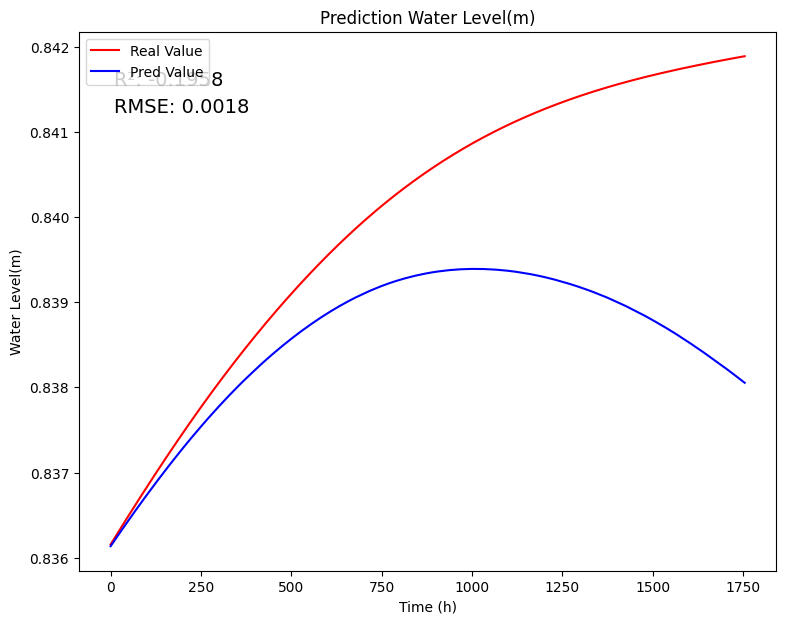

prediction_result: [0.8361346  0.8361409  0.83614725 ... 0.83806056 0.83805716 0.8380539 ]
lstm_y_turs: [0.83615522 0.8361621  0.83616896 ... 0.84188779 0.84188854 0.84188928]


In [5]:
%time
# def Stack_LSTM():
#         model = Sequential()
#         model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
#         model.add(LSTM(100, activation='relu'))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Two = 'Stack_LSTM_Model'
#     Stack_LSTM_Model.fit(trainX,trainY)
#     Result_Ana(Stack_LSTM_Model,6,Model_Name_Two)
#
#     #BiLSTM
#     def BiLSTM():
#         model = Sequential()
#         model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 6)))
#         model.add(Dense(1))
#         model.compile(optimizer='adam', loss='mse')
#         return model
#     # history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
#     BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
#     Model_Name_Three = 'BiLSTM_Model'
#     BiLSTM_Model.fit(trainX,trainY)
#     Result_Ana(BiLSTM_Model,6,Model_Name_Three)

import tensorflow as tf

# Check if GPU is available and set the GPU device
if tf.test.is_gpu_available():
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
imf_choose = 0
finally_rsult = []
finally_y_true = []


#int(len(IMF)/6)
for imf_run in range(int(len(IMF) / 6)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+6][:]
    imf_choose = imf_choose + 6
    # imf_choose = imf_choose + 6
    print('--------------------------',imf_run,'--------------------------')
    # IMF[imf_run] = ALL_Factor_IMF
    # print("ALL_Factor_IMF:",ALL_Factor_IMF)
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)
    # print(IMF_Input)

    #[AT,Baro,WD,WG,WL,WS]
    IMF_Input
    df_IMF = pd.DataFrame(IMF_Input)
    # df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF.columns = ['AT','Baro','WD','WG','WL','WS']
    df_IMF = df_IMF[['WS','WL','WG','AT','Baro','WL']]
    # print(df_IMF)

    # 数据范围过大，对数据进行归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data
    df_training, df_testing = splitData(df, 0.2)
    print(df_training.shape)
    print(df_testing.shape)

    def createXY(dataset, n_past):
        data_X = []
        data_Y = []
        for i in range(n_past, len(dataset)):
            data_X.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            data_Y.append(dataset[i, 5])

        return np.array(data_X), np.array(data_Y)


    trainX, trainY = createXY(df_training, 1)
    testX, testY = createXY(df_testing, 1)

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)
    print('----------------------------',imf_run,'------------------------------')

    # def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
    #     model = Sequential()
    #     model.add(LSTM(200, activation='relu', input_shape=(1, 6)))
    #     # optimizer = Adam()  # 设置为您希望的学习率
    #     model.add(Dense(1))
    #     model.compile(optimizer=optimizer, loss='mse')
    #     return model
    # def Stack_LSTM(optimizer='adam', batch_size=32, epochs=40):
    #     model = Sequential()
    #     model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
    #     model.add(LSTM(100, activation='relu'))
    #     model.add(Dense(1))
    #     model.compile(optimizer=optimizer, loss='mse')
    #     return model
    # Stack_LSTM_Model = KerasRegressor(Stack_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    def BiLSTM(optimizer='adam', batch_size=32, epochs=40):
        model = Sequential()
        model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 6)))
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mse')
        return model
    # history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
    BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    # N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [30, 50]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=BiLSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, 6,imf_run)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

In [43]:
# WL(Water Level(m)) For IMF1-IMF13-R True Value
finally_y_true

[array([ 0.03621333,  0.00732426, -0.00296509, ..., -0.00431312,
        -0.02566993, -0.06919002]),
 array([ 0.00767001,  0.00431724, -0.0008971 , ..., -0.00290483,
        -0.01492227, -0.05513317]),
 array([ 0.17250122,  0.0198994 , -0.1330869 , ...,  0.09810884,
         0.0262316 ,  0.0319723 ]),
 array([ 0.08270439,  0.02838551, -0.04067162, ...,  0.24199877,
         0.23604557,  0.2032358 ]),
 array([-0.06733701, -0.11840432, -0.1630385 , ..., -0.3098935 ,
        -0.30138717, -0.29206131]),
 array([ 0.00821499,  0.00975218,  0.01035952, ..., -0.02732664,
        -0.02658865, -0.0254359 ]),
 array([ 0.00289506,  0.00226593,  0.00151431, ..., -0.03069258,
        -0.03055194, -0.03005522]),
 array([0.00654777, 0.00662276, 0.00670688, ..., 0.00144703, 0.00142237,
        0.00140782]),
 array([0.00937595, 0.00968789, 0.00999509, ..., 0.02603483, 0.02589524,
        0.02575283]),
 array([0.00616914, 0.00625326, 0.00633703, ..., 0.01454221, 0.01452534,
        0.01450667]),
 array([

In [44]:
finally_ytrue_r = np.array(finally_y_true)

In [45]:
finally_ytrue_r

array([[ 0.03621333,  0.00732426, -0.00296509, ..., -0.00431312,
        -0.02566993, -0.06919002],
       [ 0.00767001,  0.00431724, -0.0008971 , ..., -0.00290483,
        -0.01492227, -0.05513317],
       [ 0.17250122,  0.0198994 , -0.1330869 , ...,  0.09810884,
         0.0262316 ,  0.0319723 ],
       ...,
       [-0.01295754, -0.012998  , -0.01303826, ...,  0.02413169,
         0.02412212,  0.02411251],
       [ 0.05570389,  0.05563788,  0.05557185, ..., -0.00364232,
        -0.00363695, -0.00363155],
       [ 0.83615522,  0.8361621 ,  0.83616896, ...,  0.84188779,
         0.84188854,  0.84188928]])

In [46]:
ALL_Factor_ReIMFS_Yture_Result = np.transpose(finally_ytrue_r)

In [47]:
ALL_Factor_ReIMFS_Yture_Result

array([[ 0.03621333,  0.00767001,  0.17250122, ..., -0.01295754,
         0.05570389,  0.83615522],
       [ 0.00732426,  0.00431724,  0.0198994 , ..., -0.012998  ,
         0.05563788,  0.8361621 ],
       [-0.00296509, -0.0008971 , -0.1330869 , ..., -0.01303826,
         0.05557185,  0.83616896],
       ...,
       [-0.00431312, -0.00290483,  0.09810884, ...,  0.02413169,
        -0.00364232,  0.84188779],
       [-0.02566993, -0.01492227,  0.0262316 , ...,  0.02412212,
        -0.00363695,  0.84188854],
       [-0.06919002, -0.05513317,  0.0319723 , ...,  0.02411251,
        -0.00363155,  0.84188928]])

In [48]:
finally_column_names = ["IMF1", "IMF2", "IMF3", "IMF4", "IMF5", "IMF6", "IMF7", "IMF8", "IMF9", "IMF10", "IMF11",
                        "IMF12", "IMF13", "Residual"]
all_factor_ceemdan_true = pd.DataFrame(ALL_Factor_ReIMFS_Yture_Result, columns=finally_column_names)

In [49]:
all_factor_ceemdan_true

IMF1      IMF2      IMF3      IMF4      IMF5      IMF6      IMF7  \
0     0.036213  0.007670  0.172501  0.082704 -0.067337  0.008215  0.002895   
1     0.007324  0.004317  0.019899  0.028386 -0.118404  0.009752  0.002266   
2    -0.002965 -0.000897 -0.133087 -0.040672 -0.163038  0.010360  0.001514   
3    -0.040671 -0.005926 -0.257005 -0.103002 -0.194175  0.010030  0.000635   
4    -0.045081 -0.002377 -0.354009 -0.134139 -0.206350  0.008874 -0.000365   
...        ...       ...       ...       ...       ...       ...       ...   
1750 -0.014992 -0.001829  0.275092  0.208950 -0.317777 -0.027060 -0.029778   
1751  0.002440 -0.004244  0.195158  0.230702 -0.316271 -0.027550 -0.030442   
1752 -0.004313 -0.002905  0.098109  0.241999 -0.309893 -0.027327 -0.030693   
1753 -0.025670 -0.014922  0.026232  0.236046 -0.301387 -0.026589 -0.030552   
1754 -0.069190 -0.055133  0.031972  0.203236 -0.292061 -0.025436 -0.030055   

          IMF8      IMF9     IMF10     IMF11     IMF12     IMF13  Residual  
0     0.006548  0.009376  0.006169  0.016144 -0.012958  0.055704  0.836155  
1     0.006623  0.009688  0.006253  0.016094 -0.012998  0.055638  0.836162  
2     0.006707  0.009995  0.006337  0.016044 -0.013038  0.055572  0.836169  
3     0.006800  0.010297  0.006420  0.015993 -0.013078  0.055506  0.836176  
4     0.006903  0.010595  0.006503  0.015942 -0.013118  0.055440  0.836183  
...        ...       ...       ...       ...       ...       ...       ...  
1750  0.001521  0.026306  0.014570  0.005612  0.024151 -0.003653  0.841886  
1751  0.001480  0.026172  0.014557  0.005617  0.024141 -0.003648  0.841887  
1752  0.001447  0.026035  0.014542  0.005622  0.024132 -0.003642  0.841888  
1753  0.001422  0.025895  0.014525  0.005626  0.024122 -0.003637  0.841889  
1754  0.001408  0.025753  0.014507  0.005630  0.024113 -0.003632  0.841889  

[1755 rows x 14 columns]

In [50]:
# 保存为CSV文件
all_factor_ceemdan_true.to_csv("StackLSTM2_ALL_Factor_LaJoll_True_ReIMFS_Result_13IMFs_R.csv", index=False)

In [51]:
# WL(Water Level(m)) IMF1-IMF13-R Prediction Value
finally_rsult

[array([ 0.05418467,  0.03404444,  0.00944054, ...,  0.00714384,
         0.00134097, -0.01895881], dtype=float32),
 array([ 0.00438736,  0.00624055,  0.00381021, ..., -0.00228793,
        -0.00135864, -0.01208876], dtype=float32),
 array([ 0.24260926,  0.10799825, -0.02832795, ...,  0.13389473,
         0.02484538, -0.00981472], dtype=float32),
 array([0.11131208, 0.08605643, 0.02768705, ..., 0.23155026, 0.22666258,
        0.2119517 ], dtype=float32),
 array([-0.01370921, -0.06796286, -0.12062695, ..., -0.28896388,
        -0.28073537, -0.2714573 ], dtype=float32),
 array([ 0.00363083,  0.00584763,  0.00730803, ..., -0.02600472,
        -0.0258527 , -0.0252407 ], dtype=float32),
 array([ 0.00356777,  0.00302911,  0.00238186, ..., -0.03356035,
        -0.03381726, -0.03364122], dtype=float32),
 array([0.00677587, 0.0068343 , 0.00690102, ..., 0.0013037 , 0.00127273,
        0.00125155], dtype=float32),
 array([0.00930517, 0.00961328, 0.00991725, ..., 0.02582468, 0.02568594,
        0.0

In [52]:
finally_r = np.array(finally_rsult)

In [53]:
finally_r

array([[ 0.05418467,  0.03404444,  0.00944054, ...,  0.00714384,
         0.00134097, -0.01895881],
       [ 0.00438736,  0.00624055,  0.00381021, ..., -0.00228793,
        -0.00135864, -0.01208876],
       [ 0.24260926,  0.10799825, -0.02832795, ...,  0.13389473,
         0.02484538, -0.00981472],
       ...,
       [-0.01319351, -0.01323774, -0.01328178, ...,  0.02459045,
         0.02458041,  0.02457033],
       [ 0.05562015,  0.05554919,  0.05547824, ..., -0.00817847,
        -0.00816973, -0.00816095],
       [ 0.8361259 ,  0.8361321 ,  0.8361384 , ...,  0.8374767 ,
         0.83747256,  0.83746845]], dtype=float32)

In [54]:
ALL_Factor_ReIMFS_Result = np.transpose(finally_r)

In [55]:
ALL_Factor_ReIMFS_Result #Result

array([[ 0.05418467,  0.00438736,  0.24260926, ..., -0.01319351,
         0.05562015,  0.8361259 ],
       [ 0.03404444,  0.00624055,  0.10799825, ..., -0.01323774,
         0.05554919,  0.8361321 ],
       [ 0.00944054,  0.00381021, -0.02832795, ..., -0.01328178,
         0.05547824,  0.8361384 ],
       ...,
       [ 0.00714384, -0.00228793,  0.13389473, ...,  0.02459045,
        -0.00817847,  0.8374767 ],
       [ 0.00134097, -0.00135864,  0.02484538, ...,  0.02458041,
        -0.00816973,  0.83747256],
       [-0.01895881, -0.01208876, -0.00981472, ...,  0.02457033,
        -0.00816095,  0.83746845]], dtype=float32)

In [56]:
finally_column_names = ["IMF1", "IMF2", "IMF3", "IMF4", "IMF5", "IMF6", "IMF7", "IMF8", "IMF9", "IMF10", "IMF11", "IMF12","IMF13","Residual"]

In [57]:
all_factor_ceemdan_prediction = pd.DataFrame(ALL_Factor_ReIMFS_Result,columns=finally_column_names)

In [58]:
all_factor_ceemdan_prediction

IMF1      IMF2      IMF3      IMF4      IMF5      IMF6      IMF7  \
0     0.054185  0.004387  0.242609  0.111312 -0.013709  0.003631  0.003568   
1     0.034044  0.006241  0.107998  0.086056 -0.067963  0.005848  0.003029   
2     0.009441  0.003810 -0.028328  0.027687 -0.120627  0.007308  0.002382   
3     0.001414  0.000107 -0.112716 -0.044064 -0.167100  0.007877  0.001617   
4    -0.024991 -0.003345 -0.215776 -0.101358 -0.199543  0.007545  0.000732   
...        ...       ...       ...       ...       ...       ...       ...   
1750  0.044216  0.006305  0.255127  0.181652 -0.289471 -0.024380 -0.031678   
1751 -0.005366 -0.000630  0.244224  0.222474 -0.293496 -0.025552 -0.032847   
1752  0.007144 -0.002288  0.133895  0.231550 -0.288964 -0.026005 -0.033560   
1753  0.001341 -0.001359  0.024845  0.226663 -0.280735 -0.025853 -0.033817   
1754 -0.018959 -0.012089 -0.009815  0.211952 -0.271457 -0.025241 -0.033641   

          IMF8      IMF9     IMF10     IMF11     IMF12     IMF13  Residual  
0     0.006776  0.009305  0.006154  0.016329 -0.013194  0.055620  0.836126  
1     0.006834  0.009613  0.006237  0.016279 -0.013238  0.055549  0.836132  
2     0.006901  0.009917  0.006321  0.016228 -0.013282  0.055478  0.836138  
3     0.006977  0.010217  0.006404  0.016177 -0.013326  0.055407  0.836145  
4     0.007061  0.010512  0.006486  0.016125 -0.013369  0.055336  0.836151  
...        ...       ...       ...       ...       ...       ...       ...  
1750  0.001386  0.026093  0.014759  0.005724  0.024610 -0.008196  0.837485  
1751  0.001342  0.025960  0.014746  0.005729  0.024600 -0.008187  0.837481  
1752  0.001304  0.025825  0.014731  0.005733  0.024590 -0.008178  0.837477  
1753  0.001273  0.025686  0.014714  0.005737  0.024580 -0.008170  0.837473  
1754  0.001252  0.025544  0.014696  0.005741  0.024570 -0.008161  0.837468  

[1755 rows x 14 columns]

In [59]:
# 保存为CSV文件
all_factor_ceemdan_prediction.to_csv("StackLSTM2_ALL_Factor_LaJolla_ReIMFS_Result_13_Two_Execute_IMFs_R.csv", index=False)

### 验证最终结果

In [77]:
df = pd.read_csv('StackLSTM2_ALL_Factor_LaJolla_ReIMFS_Result_13_Two_Execute_IMFs_R.csv')
df = df[['Pred']]

In [78]:
df

Pred
0     1.323099
1     1.092661
2     0.819375
3     0.605134
4     0.381567
...        ...
1750  1.043633
1751  1.010478
1752  0.923254
1753  0.812379
1754  0.741860

[1755 rows x 1 columns]

In [79]:
origin = pd.read_csv('../../Data/NOAA/All Station/LaJolla Station.csv')
y_true = origin['Water Level(m)']

In [80]:
#数据集划分
# test_split = round(len(y_true) * 0.20)
# print(test_split)
test_split = round(len(y_true) * 0.20)
print(test_split)

def splitData(var, per_test):
    num_test = int(len(var) * per_test)
    train_size = int(len(var) - num_test)
    train_data = var[0:train_size]
    test_data = var[train_size:train_size + num_test]
    return train_data, test_data


df_training, df_testing = splitData(y_true, 0.2)
print(df_training.shape)
print(df_testing.shape)


print("df_testing.shape",len(df_testing))

def createXY(dataset, n_past):
    data_X = []
    data_Y = []
    for i in range(n_past, len(dataset)):
        data_X.append(dataset[i - n_past:i])
        data_Y.append(dataset[i:i+1])

    return np.array(data_X), np.array(data_Y)


# trainX, trainY = createXY(df_training, 1)
testX, testY = createXY(df_testing, 1)

# print('trainX.Shape:----', trainX.shape)
# print('trainY.shape:----', trainY.shape)
print('testX.shape:----', testX.shape)
print('testY.shape:----', testY.shape)
testY

1756
(7024,)
(1756,)
df_testing.shape 1756
testX.shape:---- (1755, 1)
testY.shape:---- (1755, 1)


array([[1.16 ],
       [0.871],
       [0.589],
       ...,
       [0.875],
       [0.773],
       [0.673]])

In [81]:
y_true = testY[0:1754]
pred = df[1:1755]

In [82]:
y_true

array([[1.16 ],
       [0.871],
       [0.589],
       ...,
       [0.96 ],
       [0.875],
       [0.773]])

In [83]:
pred

Pred
1     1.092661
2     0.819375
3     0.605134
4     0.381567
5     0.257907
...        ...
1750  1.043633
1751  1.010478
1752  0.923254
1753  0.812379
1754  0.741860

[1754 rows x 1 columns]

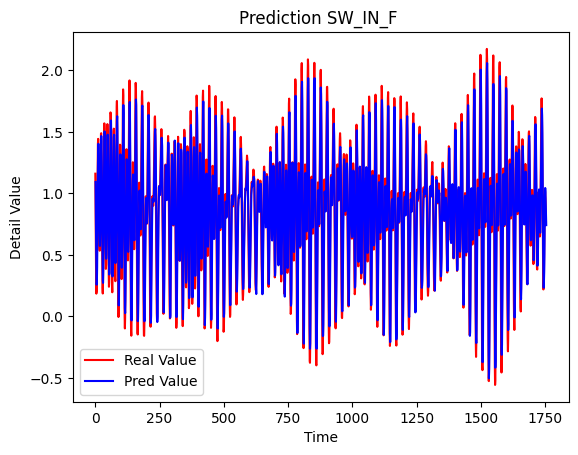

MSE: 0.0041763516649373535
MAE: 0.05030851801083239
R²: 0.9843726922812877
RMSE: 0.0646246985674777
nRMSE: [0.02366338]


In [84]:
def nRMSE(rmse,y_true):
    return rmse / (max(y_true) - min(y_true))

plt.plot(y_true, color='red', label='Real Value')
plt.plot(pred, color='blue', label='Pred Value')
plt.title('Prediction SW_IN_F ')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
# plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
plt.show()
# y_true_data = pd.DataFrame(y)
# y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
#               index=False)
# pred_data = pd.DataFrame(pred)
# pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
#              index=False)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

print('MSE:', mse(y_true, pred))
print('MAE:', mae(y_true, pred))
print('R²:', r2(y_true, pred))
print('RMSE:', np.sqrt(mse(y_true, pred)))
print('nRMSE:', nRMSE(np.sqrt(mse(y_true, pred)),y_true))

In [ ]:
y_pred = np.array(df).reshape(-1, 1)
#将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将结果存储在prediction_copies_array数组中
prediction_copies_array = np.repeat(y_pred, 6, axis=-1)
#prediction_copies_array
#prediction_copies_array.shape
pred = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(y_pred), 6)))[:,5]  #进行逆变换但是，只需要最后一列

# print(pred)
original_copies_array = np.repeat(testY, 6, axis=-1)
y_true = scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), 6)))[:, 5]
# y_true = scaler.inverse_transform(np.array(testY).reshape(-1,1))

y_true
pred
print(pred)
plt.plot(y_true, color='red', label='Real Value')
plt.plot(pred, color='blue', label='Pred Value')
plt.title('Prediction SW_IN_F ')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
# plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
plt.show()
# y_true_data = pd.DataFrame(y)
# y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
#               index=False)
# pred_data = pd.DataFrame(pred)
# pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
#              index=False)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

print('MSE:', mse(y_true, pred))
print('MAE:', mae(y_true, pred))
print('R²:', r2(y_true, pred))
print('RMSE:', np.sqrt(mse(y_true, pred)))
print('pred_finally:', pred)


In [61]:
# ALL_Factor_IMF1 = IMF[0:6][:]
# ALL_Factor_IMF1 = np.array(ALL_Factor_IMF1)
# IMF1_Input = np.transpose(ALL_Factor_IMF1)
# #[AT,Baro,WD,WG,WL,WS]
# IMF1_Input
# df_IMF1 = pd.DataFrame(IMF1_Input)
# df_IMF1.columns = ['AT','Baro','WD','WG','WL','WS']
# df_IMF1[['WS','WD','WG','AT','Baro','WL']]

## 2. Vanilla LSTM

A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

We can define a Vanilla LSTM for univariate time series forecasting as follows.

In [139]:
from torch.optim import Adam
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# define model
def N_LSTM(optimizer='adam', batch_size=32, epochs=40):
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(1, 6)))
    # optimizer = Adam()  # 设置为您希望的学习率
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model


N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_6960\1754990687.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1, validation_data=(testX, testY))


In [140]:
%%time
from sklearn.model_selection import GridSearchCV

# 定义超参数搜索范围
param_grid = {
    'optimizer': ['adam'],
    'batch_size': [32,64,128],
    'epochs': [30, 50]
}

# 执行网格搜索
grid = GridSearchCV(estimator=N_LSTM_Model, param_grid=param_grid, cv=2)
grid_result = grid.fit(trainX, trainY)

Epoch 1/30
110/110 [==============================] - 2s 3ms/step - loss: 0.0408 - val_loss: 0.0100
Epoch 2/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 3/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0086
Epoch 4/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0090 - val_loss: 0.0080
Epoch 5/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0072
Epoch 6/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0068
Epoch 7/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0066
Epoch 8/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 9/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 10/30
110/110 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0063

In [141]:
# 假设已经完成超参数优化并获得了最佳模型
best_model = grid_result.best_estimator_

# 使用最佳模型进行预测
# y_pred = best_model.predict(testX)

In [142]:
# %%time
# N_LSTM_Model.fit(trainX, trainY)

## 3. Stacked LSTM

Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.

An LSTM layer requires a three-dimensional input and LSTMs by default will produce a two-dimensional output as an interpretation from the end of the sequence.

We can address this by having the LSTM output a value for each time step in the input data by setting the return_sequences=True argument on the layer. This allows us to have 3D output from hidden LSTM layer as input to the next.

In [17]:
# univariate stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import keras.backend as K


# def Stack_LSTM():
#     model = Sequential()
#     model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
#     model.add(LSTM(100, activation='relu'))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mse')
#     return model
def create_model(optimizer='adam', batch_size=32, epochs=40):
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, 6)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Stack_LSTM_Model = KerasRegressor(build_fn=create_model(), epochs=40, verbose=1, validation_data=(testX, testY))
Stack_LSTM_Model = KerasRegressor(create_model,verbose=1)
# history = Stack_LSTM().fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))

# Stack_LSTM_Model = KerasRegressor(Stack_LSTM,epochs=30,verbose=1, validation_data=(testX, testY))

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_35732\4008304438.py:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  Stack_LSTM_Model = KerasRegressor(create_model,verbose=1)


In [18]:
from sklearn.model_selection import GridSearchCV

# 定义超参数搜索范围
param_grid = {
    'optimizer': ['adam'],
    'batch_size': [5,10,16, 32, 64],
    'epochs': [20,30, 40, 50]
}
# 执行网格搜索
grid = GridSearchCV(estimator=Stack_LSTM_Model, param_grid=param_grid, cv=2)
grid_result = grid.fit(trainX, trainY)

Epoch 1/20
702/702 [==============================] - 2s 1ms/step - loss: 0.0143
Epoch 2/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 3/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 4/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0046
Epoch 5/20
702/702 [==============================] - 1s 971us/step - loss: 0.0045
Epoch 6/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 7/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 8/20
702/702 [==============================] - 1s 980us/step - loss: 0.0046
Epoch 9/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 10/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 11/20
702/702 [==============================] - 1s 1ms/step - loss: 0.0044
Epoch 12/20
702/702 [==============================] - 1s 981us/step - loss: 0.0044
Epoch 13/20
702/702

In [112]:
# 假设已经完成超参数优化并获得了最佳模型
best_model = grid_result.best_estimator_

# 使用最佳模型进行预测
y_pred = best_model.predict(testX)


351/351 [==============================] - 0s 800us/step


In [26]:
%%time
Stack_LSTM_Model.fit(trainX, trainY)

Epoch 1/40
220/220 [==============================] - 3s 3ms/step - loss: 0.0375 - val_loss: 0.0059
Epoch 2/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0055
Epoch 3/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0054
Epoch 4/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0055
Epoch 5/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0056
Epoch 6/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0059
Epoch 7/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 8/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0060
Epoch 9/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0058
Epoch 10/40
220/220 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0056

## 4. Bidirectional LSTM


On some sequence prediction problems, it can be beneficial to allow the LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.

This is called a Bidirectional LSTM.

We can implement a Bidirectional LSTM for univariate time series forecasting by wrapping the first hidden layer in a wrapper layer called Bidirectional.

In [243]:
# univariate bidirectional lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
import keras.backend as K


def BiLSTM():
    model = Sequential()
    model.add(Bidirectional(LSTM(200, activation='relu'), input_shape=(1, 14)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


# BiLSTM_Model = BiLSTM()
# history = BiLSTM_Model.fit(trainX,trainY,epochs=30,verbose=1,validation_data=(testX, testY))
BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
# Access the training and validation loss values
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# Print the training and validation loss values for each epoch
# for epoch in range(len(train_loss)):
#     print("Epoch {}: Train Loss = {}, Val Loss = {}".format(epoch+1, train_loss[epoch], val_loss[epoch]))

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_429876\2549510797.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  BiLSTM_Model = KerasRegressor(BiLSTM, epochs=40, verbose=1, validation_data=(testX, testY))


In [244]:
%%time
BiLSTM_Model.fit(trainX, trainY)

Epoch 1/40
1039/1039 [==============================] - 4s 2ms/step - loss: 0.0119 - val_loss: 0.0096
Epoch 2/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0073 - val_loss: 0.0087
Epoch 3/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0068 - val_loss: 0.0076
Epoch 4/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0067 - val_loss: 0.0070
Epoch 5/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0065 - val_loss: 0.0071
Epoch 6/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0064 - val_loss: 0.0068
Epoch 7/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0063 - val_loss: 0.0068
Epoch 8/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0063 - val_loss: 0.0077
Epoch 9/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.0062 - val_loss: 0.0065
Epoch 10/40
1039/1039 [==============================] - 2s 2ms/step - loss: 0.006

## 5. CNN LSTM 

A convolutional neural network, or CNN for short, is a type of neural network developed for working with two-dimensional image data.

The CNN can be very effective at automatically extracting and learning features from one-dimensional sequence data such as univariate time series data.

In [ ]:
# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps):
# 	X, y = list(), list()
# 	for i in range(len(sequence)):
# 		# find the end of this pattern
# 		end_ix = i + n_steps
# 		# check if we are beyond the sequence
# 		if end_ix > len(sequence)-1:
# 			break
# 		# gather input and output parts of the pattern
# 		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
# 		X.append(seq_x)
# 		y.append(seq_y)
# 	return array(X), array(y)

# # define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# # choose a number of time steps
# n_steps = 4
# # split into samples
# X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
# n_features = 1
# n_seq = 1
# n_steps = 2
# X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [11]:
# Reshape trainX and testX to (samples, timesteps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


In [ ]:
trainX.shape

In [ ]:
testX.shape

In [ ]:
trainX.shape

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D

# Reshape trainX and testX to (samples, timesteps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[2], trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[2], testX.shape[1]))


# Define model
def CnnLSTM():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


# Train the model
CnnLSTM_Model = CnnLSTM().fit(trainX, trainY, epochs=30, verbose=1, validation_data=(testX, testY))

Epoch 1/30
784/784 [==============================] - 4s 4ms/step - loss: 0.0158 - val_loss: 0.0106
Epoch 2/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 3/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0107 - val_loss: 0.0099
Epoch 4/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 5/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 6/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0101 - val_loss: 0.0104
Epoch 7/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 8/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 9/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0097 - val_loss: 0.0102
Epoch 10/30
784/784 [==============================] - 3s 3ms/step - loss: 0.0096 - val_loss: 0.0096

In [ ]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


# define model
def CnnLSTM():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


CnnLSTM_Model = CnnLSTM().fit(trainX, trainY, epochs=30, verbose=1, validation_data=(testX, testY))

In [ ]:
# demonstrate prediction
# x_input = array([60, 70, 80, 90])
# x_input = x_input.reshape((1, n_seq, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
# n_features = 1
# n_seq = 2
# n_steps = 2
# X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [ ]:
X

In [ ]:
X.shape

## 6. ConvLSTM

A type of LSTM related to the CNN-LSTM is the ConvLSTM, where the convolutional reading of input is built directly into each LSTM unit.

The ConvLSTM was developed for reading two-dimensional spatial-temporal data, but can be adapted for use with univariate time series forecasting.

In [ ]:
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D


# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input = array([60, 70, 80, 90])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ## Multivariate LSTM Models

Multivariate time series data means data where there is more than one observation for each time step.



In [ ]:
# multivariate lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ##  Multi-Step LSTM Models

A time series forecasting problem that requires a prediction of multiple time steps into the future can be referred to as multi-step time series forecasting

In [ ]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ## Encoder-Decoder LSTM


In [ ]:
# univariate multi-step encoder-decoder lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed


# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

* ## Multivariate Multi-Step LSTM Models


In [ ]:
# multivariate multi-step stacked lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([[70, 75], [80, 85], [90, 95]])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

Reference:-  https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecastings/